1.Introduction and Background

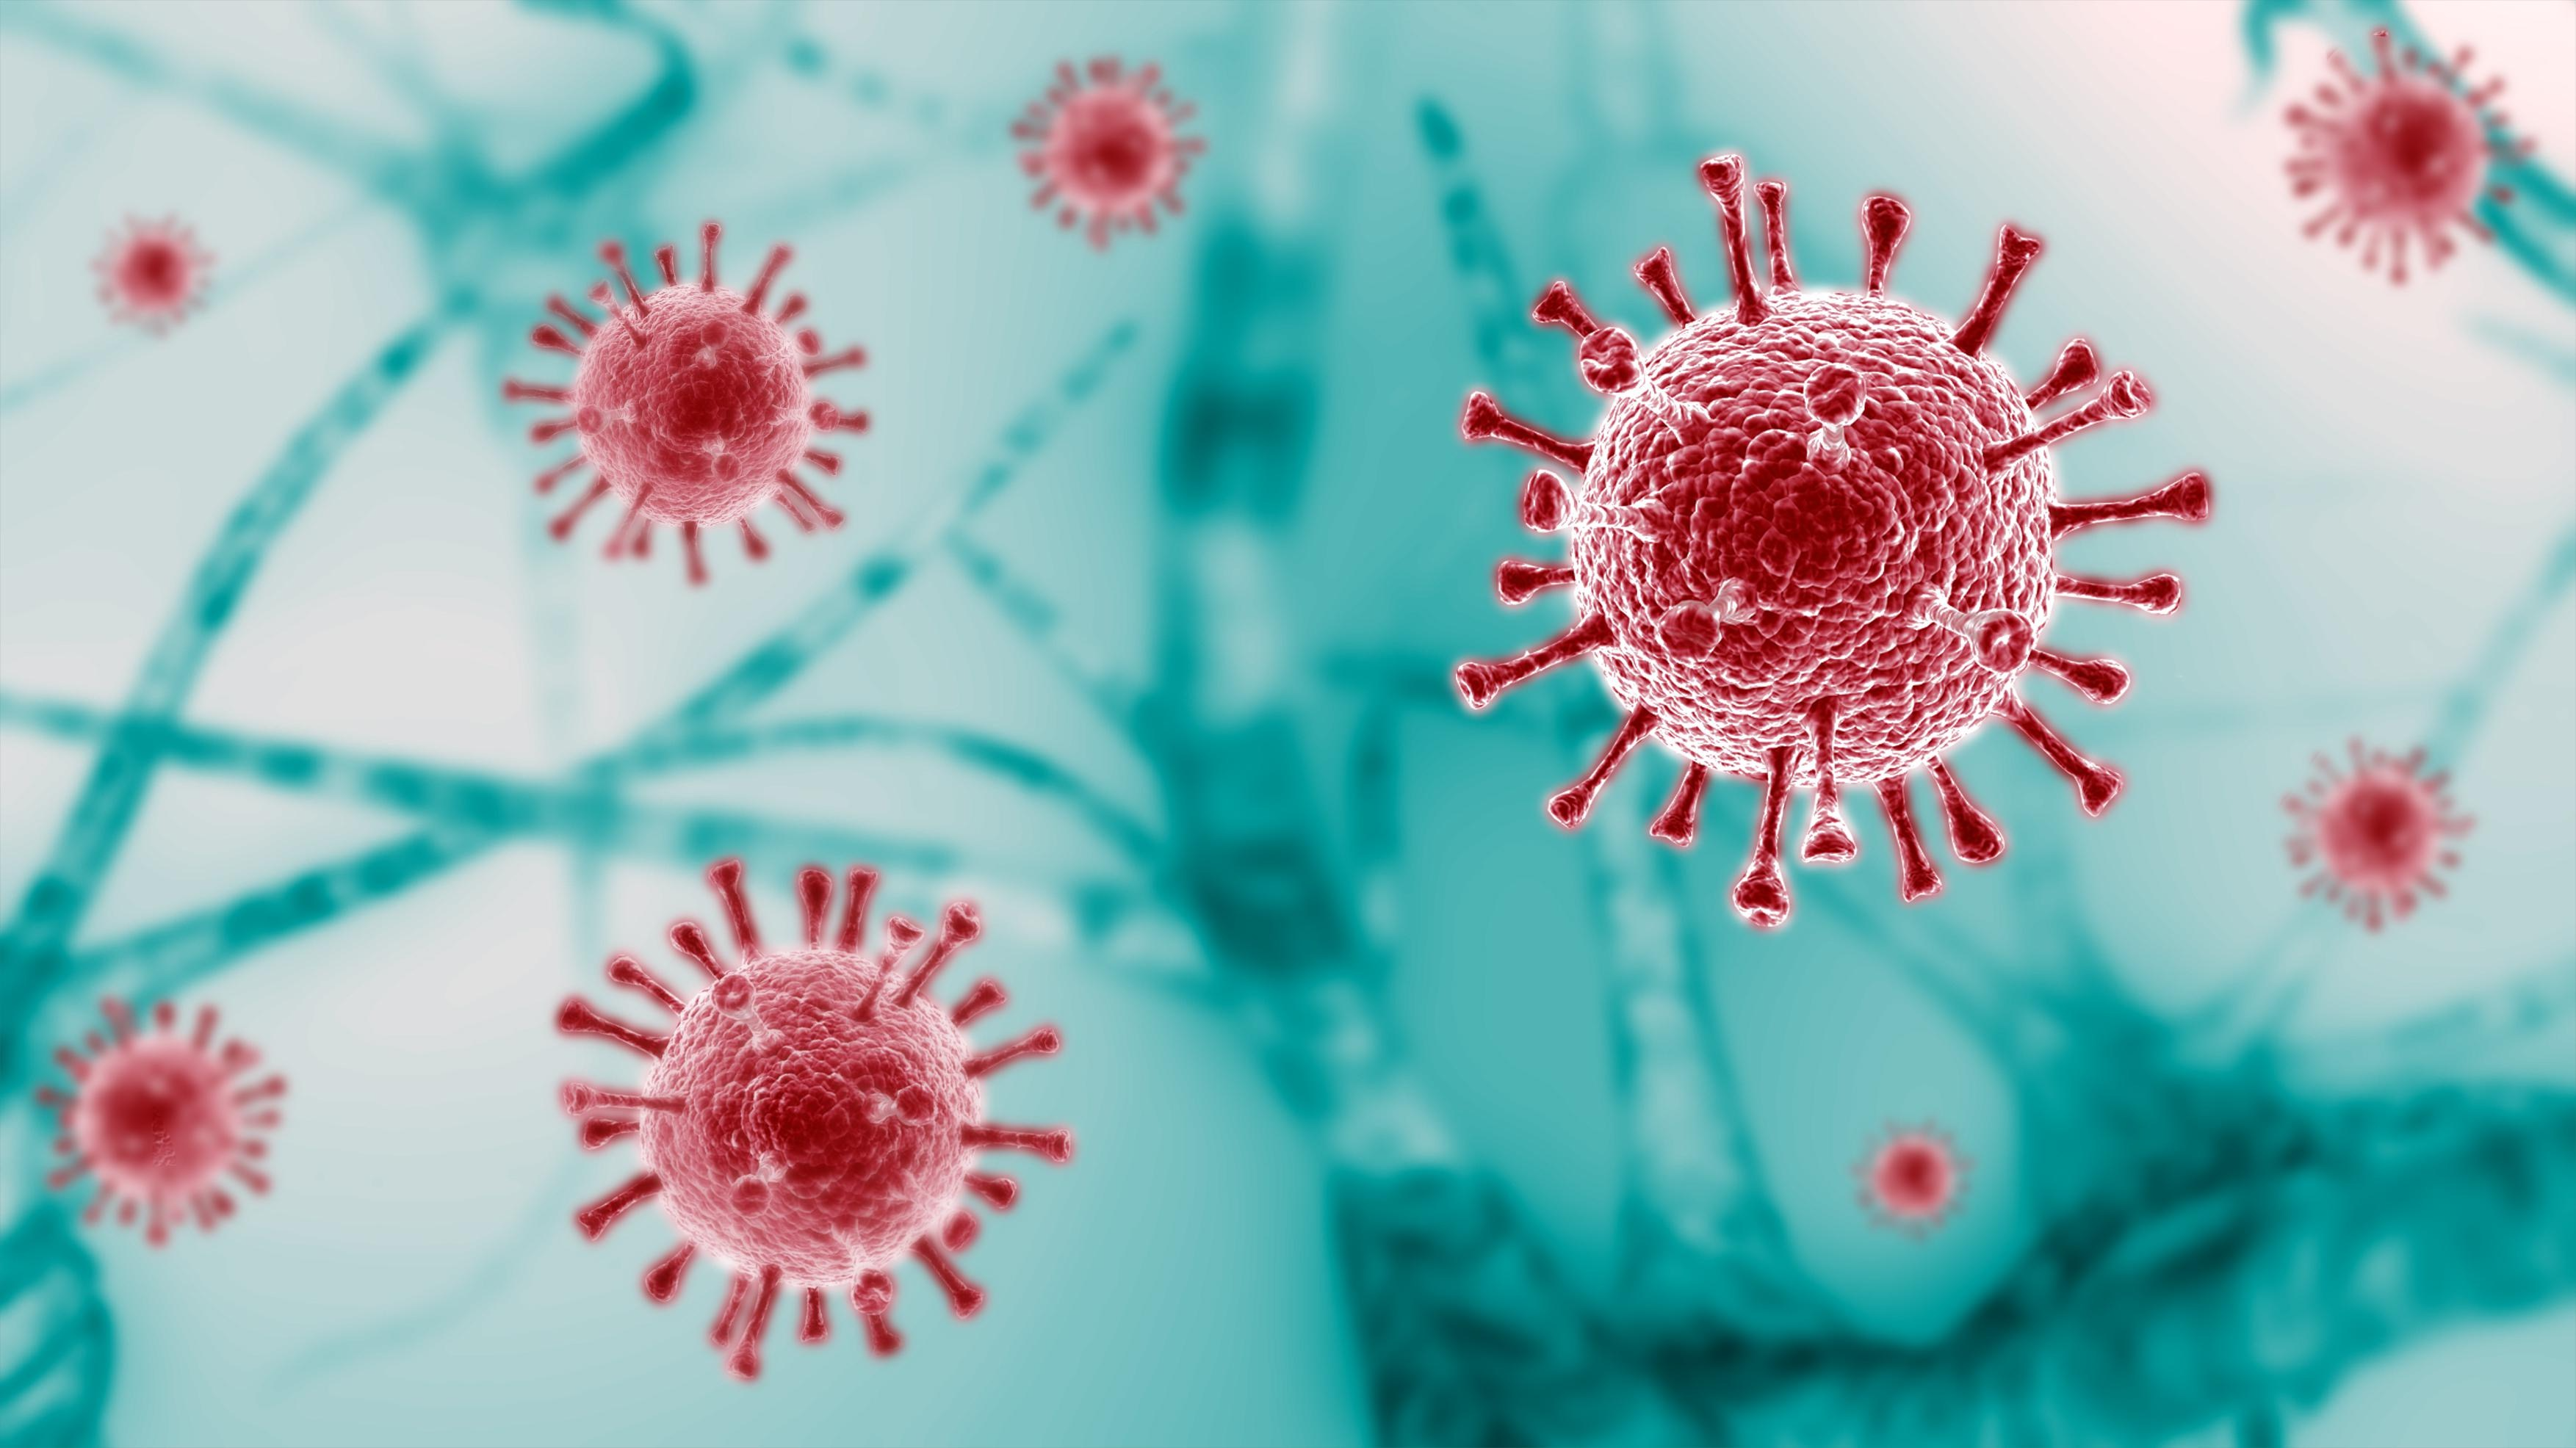

Many people have done some research on the impact of COVID-19 on the economy, education and medication, but we are more interested in culture, especially music. The epidemic has affected everyone in the world in one way or another and we were curious to see if this situation had an impact on the artists who write the songs. We decided to use the lyrics of popular songs as a study to see if there were any changes in the lyrics of songs before and after the epidemic, especially before and after 2020 when COVID-19 widely spread in most countries around the world.


The goal of our project is to clarify a question: Does COVID-19 have any effect on lyrics? If it does, it is good or bad?

2.Tutorials

(1) Scrape songs

In [1]:
import lyricsgenius
import api_key
import api_key_kkbox
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pathlib import Path
from collections import Counter
import re
import nltk
import time
from selenium import webdriver
from selenium.webdriver import Chrome
from kkbox_developer_sdk.api import KKBOXAPI
import json
from kkbox_developer_sdk.auth_flow import KKBOXOAuth
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentimentAnalyser = SentimentIntensityAnalyzer()
pd.options.display.max_colwidth = 400
from pygtrans import Translate
client = Translate()

In [2]:
client_access_token = api_key.your_client_access_token
LyricsGenius = lyricsgenius.Genius(client_access_token)

1) Scrape English lyrics from Billboard

a. Write the function to get the song ducuments:

In [57]:
def song_document(url):
    response = requests.get(url)
    html_string = response.text
    document = BeautifulSoup(html_string, "html.parser")
    return document

b. Write the function to get the Billboard title list:

In [4]:
def get_title_billboard(document):
    top50_billboard_title = document.find_all("h3")
    all_titles = [item.text for item in top50_billboard_title]
    billboard_title = []
    for item in all_titles:
        item = item.replace('\n', '')
        item = item.replace('\t', '')
        billboard_title.append(item)
        billboard_title = billboard_title[:50]
    return billboard_title

c. Get the Billboard title list from 2018 to 2022:

In [5]:
top50_billboard_title_2018 = get_title_billboard(song_ducument("https://www.billboard.com/charts/year-end/2018/hot-100-songs/"))
top50_billboard_title_2019 = get_title_billboard(song_ducument("https://www.billboard.com/charts/year-end/2019/hot-100-songs/"))
top50_billboard_title_2020 = get_title_billboard(song_ducument("https://www.billboard.com/charts/year-end/2020/hot-100-songs/"))
top50_billboard_title_2021 = get_title_billboard(song_ducument("https://www.billboard.com/charts/year-end/2021/hot-100-songs/"))
top50_billboard_title_2022 = get_title_billboard(song_ducument("https://www.billboard.com/charts/year-end/2022/hot-100-songs/"))

d. Write the function to get the Billboard artist list:

In [6]:
def get_artist_billboard(document):
    top50_billboard_artist = document.find_all("span")
    all_artists = [item.text for item in top50_billboard_artist]
    item_list = []
    billboard_artist = []
    for item in all_artists:
        if '\n\t\n\t' in item:
            item = item.replace('\n', '')
            item = item.replace('\t', '')
            item_list.append(item)
            billboard_artist = item_list[1::2][:50]
    return billboard_artist

e. Get the Billboard artist list from 2018 to 2022:

In [8]:
top50_billboard_artist_2018 = get_artist_billboard(song_ducument("https://www.billboard.com/charts/year-end/2018/hot-100-songs/"))
top50_billboard_artist_2019 = get_artist_billboard(song_ducument("https://www.billboard.com/charts/year-end/2019/hot-100-songs/"))
top50_billboard_artist_2020 = get_artist_billboard(song_ducument("https://www.billboard.com/charts/year-end/2020/hot-100-songs/"))
top50_billboard_artist_2021 = get_artist_billboard(song_ducument("https://www.billboard.com/charts/year-end/2021/hot-100-songs/"))
top50_billboard_artist_2022 = get_artist_billboard(song_ducument("https://www.billboard.com/charts/year-end/2022/hot-100-songs/"))

f. Write the function to get the lyrics list:

In [9]:
def get_lyrics(title_list, artist_list):
    lyrics = []
    for title, artist in zip(title_list, artist_list):
        all_lyrics = LyricsGenius.search_song(title, artist)
        if all_lyrics != None:
            lyrics.append(all_lyrics.lyrics)
        else:
            'No lyrics'
    return lyrics

g. Get the Billboard lyrics list from 2018 to 2022：

In [23]:
top50_billboard_lyrics_2018 = get_lyrics(top50_billboard_title_2018, top50_billboard_artist_2018)

Searching for "God's Plan" by Drake...
Done.
Searching for "Perfect" by Ed Sheeran...
Done.
Searching for "Meant To Be" by Bebe Rexha & Florida Georgia Line...
Done.
Searching for "Havana" by Camila Cabello Featuring Young Thug...
Done.
Searching for "Rockstar" by Post Malone Featuring 21 Savage...
Done.
Searching for "Psycho" by Post Malone Featuring Ty Dolla $ign...
Done.
Searching for "I Like It" by Cardi B, Bad Bunny & J Balvin...
Done.
Searching for "The Middle" by Zedd, Maren Morris & Grey...
Done.
Searching for "In My Feelings" by Drake...
Done.
Searching for "Girls Like You" by Maroon 5 Featuring Cardi B...
Done.
Searching for "Nice For What" by Drake...
Done.
Searching for "Lucid Dreams" by Juice WRLD...
Done.
Searching for "Better Now" by Post Malone...
Done.
Searching for "Finesse" by Bruno Mars & Cardi B...
Done.
Searching for "Boo'd Up" by Ella Mai...
Done.
Searching for "New Rules" by Dua Lipa...
Done.
Searching for "Sad!" by XXXTENTACION...
Done.
Searching for "Never Be 

In [33]:
top50_billboard_lyrics_2019 = get_lyrics(top50_billboard_title_2019, top50_billboard_artist_2019)

Searching for "Old Town Road" by Lil Nas X Featuring Billy Ray Cyrus...
Done.
Searching for "Sunflower (Spider-Man: Into The Spider-Verse)" by Post Malone & Swae Lee...
Done.
Searching for "Without Me" by Halsey...
Done.
Searching for "Bad Guy" by Billie Eilish...
Done.
Searching for "Wow." by Post Malone...
Done.
Searching for "Happier" by Marshmello & Bastille...
Done.
Searching for "7 Rings" by Ariana Grande...
Done.
Searching for "Talk" by Khalid...
Done.
Searching for "Sicko Mode" by Travis Scott...
Done.
Searching for "Sucker" by Jonas Brothers...
Done.
Searching for "High Hopes" by Panic! At The Disco...
Done.
Searching for "Thank U, Next" by Ariana Grande...
Done.
Searching for "Truth Hurts" by Lizzo...
Done.
Searching for "Dancing With A Stranger" by Sam Smith & Normani...
Done.
Searching for "Senorita" by Shawn Mendes & Camila Cabello...
Done.
Searching for "I Don't Care" by Ed Sheeran & Justin Bieber...
Done.
Searching for "Eastside" by benny blanco, Halsey & Khalid...
Done.

In [35]:
top50_billboard_lyrics_2020 = get_lyrics(top50_billboard_title_2020, top50_billboard_artist_2020)

Searching for "Blinding Lights" by The Weeknd...
Done.
Searching for "Circles" by Post Malone...
Done.
Searching for "The Box" by Roddy Ricch...
Done.
Searching for "Don't Start Now" by Dua Lipa...
Done.
Searching for "Rockstar" by DaBaby Featuring Roddy Ricch...
Done.
Searching for "Adore You" by Harry Styles...
Done.
Searching for "Life Is Good" by Future Featuring Drake...
Done.
Searching for "Memories" by Maroon 5...
Done.
Searching for "The Bones" by Maren Morris...
Done.
Searching for "Someone You Loved" by Lewis Capaldi...
Done.
Searching for "Say So" by Doja Cat...
Done.
Searching for "I Hope" by Gabby Barrett Featuring Charlie Puth...
Done.
Searching for "Whats Poppin" by Jack Harlow Featuring DaBaby, Tory Lanez & Lil Wayne...
Done.
Searching for "Dance Monkey" by Tones And I...
Done.
Searching for "Savage" by Megan Thee Stallion...
Done.
Searching for "Roxanne" by Arizona Zervas...
Done.
Searching for "Intentions" by Justin Bieber Featuring Quavo...
Done.
Searching for "Every

In [38]:
top50_billboard_lyrics_2021 = get_lyrics(top50_billboard_title_2021, top50_billboard_artist_2021)

Searching for "Levitating" by Dua Lipa...
Done.
Searching for "Save Your Tears" by The Weeknd & Ariana Grande...
Done.
Searching for "Blinding Lights" by The Weeknd...
Done.
Searching for "Mood" by 24kGoldn Featuring iann dior...
Done.
Searching for "Good 4 U" by Olivia Rodrigo...
Done.
Searching for "Kiss Me More" by Doja Cat Featuring SZA...
Done.
Searching for "Leave The Door Open" by Silk Sonic (Bruno Mars & Anderson .Paak)...
Done.
Searching for "Drivers License" by Olivia Rodrigo...
Done.
Searching for "Montero (Call Me By Your Name)" by Lil Nas X...
Done.
Searching for "Peaches" by Justin Bieber Featuring Daniel Caesar & Giveon...
Done.
Searching for "Butter" by BTS...
Done.
Searching for "Stay" by The Kid LAROI & Justin Bieber...
Done.
Searching for "Deja Vu" by Olivia Rodrigo...
Done.
Searching for "Positions" by Ariana Grande...
Done.
Searching for "Bad Habits" by Ed Sheeran...
Done.
Searching for "Heat Waves" by Glass Animals...
Done.
Searching for "Without You" by The Kid L

In [40]:
top50_billboard_lyrics_2022 = get_lyrics(top50_billboard_title_2022, top50_billboard_artist_2022)

Searching for "Heat Waves" by Glass Animals...
Done.
Searching for "As It Was" by Harry Styles...
Done.
Searching for "Stay" by The Kid LAROI & Justin Bieber...
Done.
Searching for "Easy On Me" by Adele...
Done.
Searching for "Shivers" by Ed Sheeran...
Done.
Searching for "First Class" by Jack Harlow...
Done.
Searching for "Big Energy" by Latto...
Done.
Searching for "Ghost" by Justin Bieber...
Done.
Searching for "Super Gremlin" by Kodak Black...
Done.
Searching for "Cold Heart (PNAU Remix)" by Elton John & Dua Lipa...
Done.
Searching for "Wait For U" by Future Featuring Drake & Tems...
Done.
Searching for "About Damn Time" by Lizzo...
Done.
Searching for "Bad Habits" by Ed Sheeran...
Done.
Searching for "Thats What I Want" by Lil Nas X...
Done.
Searching for "Enemy" by Imagine Dragons X JID...
Done.
Searching for "Industry Baby" by Lil Nas X & Jack Harlow...
Done.
Searching for "abcdefu" by GAYLE...
Done.
Searching for "Need To Know" by Doja Cat...
Done.
Searching for "Wasted On You"

h. Write the function to plot to the title list, the artist list, and the lyrics list from the same year to a dataframe ：

In [41]:
def plot_dataframe(title_list, artist_list, lyrics_list):
    song_data = {'title': title_list, 'artist': artist_list, 'lyrics': lyrics_list}
    return pd.DataFrame(song_data)

i. Plot the Billboard dataframes from 2018 to 2022:

In [42]:
top50_billboard_2018_df = plot_dataframe(top50_billboard_title_2018, top50_billboard_artist_2018, top50_billboard_lyrics_2018)
top50_billboard_2018_df

title                                       artist  \
0             God's Plan                                        Drake   
1                Perfect                                   Ed Sheeran   
2            Meant To Be            Bebe Rexha & Florida Georgia Line   
3                 Havana          Camila Cabello Featuring Young Thug   
4               Rockstar              Post Malone Featuring 21 Savage   
5                 Psycho          Post Malone Featuring Ty Dolla $ign   
6              I Like It                Cardi B, Bad Bunny & J Balvin   
7             The Middle                    Zedd, Maren Morris & Grey   
8         In My Feelings                                        Drake   
9         Girls Like You                   Maroon 5 Featuring Cardi B   
10         Nice For What                                        Drake   
11          Lucid Dreams                                   Juice WRLD   
12            Better Now                                  Post Malone   
13               Finesse                         Bruno Mars & Cardi B   
14              Boo'd Up                                     Ella Mai   
15             New Rules                                     Dua Lipa   
16                  Sad!                                 XXXTENTACION   
17     Never Be The Same                               Camila Cabello   
18             Love Lies                             Khalid & Normani   
19  No Tears Left To Cry                                Ariana Grande   
20                  Mine                                        Bazzi   
21               Thunder                              Imagine Dragons   
22            Look Alive                   BlocBoy JB Featuring Drake   
23              Delicate                                 Taylor Swift   
24            Yes Indeed                             Lil Baby & Drake   
25               Friends                      Marshmello & Anne-Marie   
26           Bad At Love                                       Halsey   
27                 Taste                        Tyga Featuring Offset   
28          Let You Down                                           NF   
29              No Limit        G-Eazy Featuring A$AP Rocky & Cardi B   
30                  FEFE  6ix9ine Featuring Nicki Minaj & Murda Beatz   
31               Tequila                                   Dan + Shay   
32         Feel It Still                            Portugal. The Man   
33            MotorSport                 Migos, Nicki Minaj & Cardi B   
34      I Like Me Better                                         Lauv   
35            Youngblood                          5 Seconds Of Summer   
36     Whatever It Takes                              Imagine Dragons   
37        Ric Flair Drip                        Offset & Metro Boomin   
38          I Fall Apart                                  Post Malone   
39           Pray For Me                  The Weeknd & Kendrick Lamar   
40           Back To You                                 Selena Gomez   
41            Sicko Mode                                 Travis Scott   
42       Walk It Talk It                        Migos Featuring Drake   
43            Gucci Gang                                     Lil Pump   
44               Him & I                              G-Eazy & Halsey   
45           In My Blood                                 Shawn Mendes   
46         All The Stars                         Kendrick Lamar & SZA   
47              Stir Fry                                        Migos   
48  Too Good At Goodbyes                                    Sam Smith   
49                 Love.              Kendrick Lamar Featuring Zacari   

                                                                                                                                                                                                                                                                                                       

In [43]:
top50_billboard_2019_df = plot_dataframe(top50_billboard_title_2019, top50_billboard_artist_2019, top50_billboard_lyrics_2019)
top50_billboard_2019_df

title  \
0                                   Old Town Road   
1   Sunflower (Spider-Man: Into The Spider-Verse)   
2                                      Without Me   
3                                         Bad Guy   
4                                            Wow.   
5                                         Happier   
6                                         7 Rings   
7                                            Talk   
8                                      Sicko Mode   
9                                          Sucker   
10                                     High Hopes   
11                                  Thank U, Next   
12                                    Truth Hurts   
13                        Dancing With A Stranger   
14                                       Senorita   
15                                   I Don't Care   
16                                       Eastside   
17                                      Going Bad   
18                                        Shallow   
19                                         Better   
20                                    No Guidance   
21                                 Girls Like You   
22                               Sweet But Psycho   
23                                           Suge   
24                                   Middle Child   
25                                  Drip Too Hard   
26                              Someone You Loved   
27                                         Ran$om   
28                            If I Can't Have You   
29                                       Goodbyes   
30                                           ZEZE   
31                                     Better Now   
32                                     Youngblood   
33                             Money In The Grave   
34                                     Speechless   
35       Break Up With Your Girlfriend, I'm Bored   
36                                      Please Me   
37                                          Money   
38                          You Need To Calm Down   
39                                         Panini   
40                                Look Back At It   
41                                          A Lot   
42                                            ME!   
43                                            MIA   
44                                        Pop Out   
45                                Beautiful Crazy   
46                                       Thotiana   
47                                   Lucid Dreams   
48                                       Mo Bamba   
49                               Beautiful People   

                                         artist  \
0           Lil Nas X Featuring Billy Ray Cyrus   
1                        Post Malone & Swae Lee   
2                                        Halsey   
3                                 Billie Eilish   
4                                   Post Malone   
5                         Marshmello & Bastille   
6                                 Ariana Grande   
7                                        Khalid   
8                                  Travis Scott   
9                                Jonas Brothers   
10                          Panic! At The Disco   
11                                Ariana Grande   
12                                        Lizzo   
13                          Sam Smith & Normani   
14                Shawn Mendes & Camila Cabello   
15                   Ed Sheeran & Justin Bieber   
16                benny blanco, Halsey & Khalid   
17                    Meek Mill Featuring Drake   
18                   Lady Gaga & Bradley Cooper   
19                                       Khalid   
20                  Chris Brown Featuring Drake   
21                   Maroon 5 Featuring Cardi B   
22                                      Ava Max   
23                                       DaBaby   
24                                      J. Cole   
25            

In [44]:
top50_billboard_2020_df = plot_dataframe(top50_billboard_title_2020, top50_billboard_artist_2020, top50_billboard_lyrics_2020)
top50_billboard_2020_df

title  \
0                    Blinding Lights   
1                            Circles   
2                            The Box   
3                    Don't Start Now   
4                           Rockstar   
5                          Adore You   
6                       Life Is Good   
7                           Memories   
8                          The Bones   
9                  Someone You Loved   
10                            Say So   
11                            I Hope   
12                      Whats Poppin   
13                      Dance Monkey   
14                            Savage   
15                           Roxanne   
16                        Intentions   
17               Everything I Wanted   
18                             Roses   
19                  Watermelon Sugar   
20                     Before You Go   
21                           Falling   
22                      10,000 Hours   
23                               WAP   
24                           Ballin'   
25                   Hot Girl Bummer   
26                   Blueberry Faygo   
27                         Heartless   
28                               BOP   
29               Lose You To Love Me   
30                      Good As Hell   
31                      Toosie Slide   
32                    Break My Heart   
33                       Chasin' You   
34  Savage Love (Laxed - Siren Beat)   
35                       No Guidance   
36                          My Oh My   
37                          Dynamite   
38                          Go Crazy   
39                      High Fashion   
40               Laugh Now Cry Later   
41                              Woah   
42                         Death Bed   
43                          Senorita   
44               HIGHEST IN THE ROOM   
45                           Bad Guy   
46                              Mood   
47                        Rain On Me   
48                     For The Night   
49         RITMO (Bad Boys For Life)   

                                                  artist  \
0                                             The Weeknd   
1                                            Post Malone   
2                                            Roddy Ricch   
3                                               Dua Lipa   
4                           DaBaby Featuring Roddy Ricch   
5                                           Harry Styles   
6                                 Future Featuring Drake   
7                                               Maroon 5   
8                                           Maren Morris   
9                                          Lewis Capaldi   
10                                              Doja Cat   
11                  Gabby Barrett Featuring Charlie Puth   
12  Jack Harlow Featuring DaBaby, Tory Lanez & Lil Wayne   
13                                           Tones And I   
14                                   Megan Thee Stallion   
15                                        Arizona Zervas   
16                         Justin Bieber Featuring Quavo   
17                                         Billie Eilish   
18                                             SAINt JHN   
19                                          Harry Styles   
20                                         Lewis Capaldi   
21                                         Trevor Daniel   
22                            Dan + Shay & Justin Bieber   
23                 Cardi B Featuring Megan Thee Stallion   
24                                 Mustard & Roddy Ricch   
25                                             blackbear   
26                                             Lil Mosey   
27                                            The Weeknd   
28                                                DaBaby   
29                                          Selena Gomez   
30                                                 Lizzo   
31                                                 Drake   
32        

In [45]:
top50_billboard_2021_df = plot_dataframe(top50_billboard_title_2021, top50_billboard_artist_2021, top50_billboard_lyrics_2021)
top50_billboard_2021_df

title  \
0                       Levitating   
1                  Save Your Tears   
2                  Blinding Lights   
3                             Mood   
4                         Good 4 U   
5                     Kiss Me More   
6              Leave The Door Open   
7                  Drivers License   
8   Montero (Call Me By Your Name)   
9                          Peaches   
10                          Butter   
11                            Stay   
12                         Deja Vu   
13                       Positions   
14                      Bad Habits   
15                      Heat Waves   
16                     Without You   
17               Forever After All   
18                        Go Crazy   
19          Astronaut In The Ocean   
20                           34+35   
21         What You Know Bout Love   
22             My Ex's Best Friend   
23                   Industry Baby   
24                  Therefore I Am   
25                              Up   
26                      Fancy Like   
27                          Dakiti   
28                     Best Friend   
29                         Rapstar   
30          Heartbreak Anniversary   
31                   For The Night   
32                Calling My Phone   
33              Beautiful Mistakes   
34                            Holy   
35                           On Me   
36             You Broke Me First.   
37                         Traitor   
38                   Back In Blood   
39                          I Hope   
40                        Dynamite   
41                        Wockesha   
42                       You Right   
43                        Beat Box   
44             Laugh Now Cry Later   
45                    Need To Know   
46                 Wants And Needs   
47                      Way 2 Sexy   
48                       Telepatia   
49                         Whoopty   

                                                artist  \
0                                             Dua Lipa   
1                           The Weeknd & Ariana Grande   
2                                           The Weeknd   
3                         24kGoldn Featuring iann dior   
4                                       Olivia Rodrigo   
5                               Doja Cat Featuring SZA   
6             Silk Sonic (Bruno Mars & Anderson .Paak)   
7                                       Olivia Rodrigo   
8                                            Lil Nas X   
9       Justin Bieber Featuring Daniel Caesar & Giveon   
10                                                 BTS   
11                       The Kid LAROI & Justin Bieber   
12                                      Olivia Rodrigo   
13                                       Ariana Grande   
14                                          Ed Sheeran   
15                                       Glass Animals   
16                                       The Kid LAROI   
17                                          Luke Combs   
18                            Chris Brown & Young Thug   
19                                         Masked Wolf   
20  Ariana Grande Feat. Doja Cat & Megan Thee Stallion   
21                                           Pop Smoke   
22                       Machine Gun Kelly X blackbear   
23                             Lil Nas X & Jack Harlow   
24                                       Billie Eilish   
25                                             Cardi B   
26                                        Walker Hayes   
27                             Bad Bunny & Jhay Cortez   
28                         Saweetie Featuring Doja Cat   
29                                              Polo G   
30                                              Giveon   
31               Pop Smoke Featuring Lil Baby & DaBaby   
32                            Lil Tjay Featuring 6LACK   
33              Maroon 5 Featuring Megan Thee Stallion   
34           Justin Bieber Featuring Chance The Rapper   
35

In [46]:
top50_billboard_2022_df = plot_dataframe(top50_billboard_title_2022, top50_billboard_artist_2022, top50_billboard_lyrics_2022)
top50_billboard_2022_df

title  \
0                               Heat Waves   
1                                As It Was   
2                                     Stay   
3                               Easy On Me   
4                                  Shivers   
5                              First Class   
6                               Big Energy   
7                                    Ghost   
8                            Super Gremlin   
9                  Cold Heart (PNAU Remix)   
10                              Wait For U   
11                         About Damn Time   
12                              Bad Habits   
13                       Thats What I Want   
14                                   Enemy   
15                           Industry Baby   
16                                 abcdefu   
17                            Need To Know   
18                           Wasted On You   
19                         Me Porto Bonito   
20                                   Woman   
21                        Titi Me Pregunto   
22  Running Up That Hill (A Deal With God)   
23               We Don't Talk About Bruno   
24                      Late Night Talking   
25             I Like You (A Happier Song)   
26                               You Proof   
27                               Bad Habit   
28                                 Sunroof   
29                           One Right Now   
30                                Good 4 U   
31                         Numb Little Bug   
32                             Jimmy Cooks   
33                          'Til You Can't   
34                              Fancy Like   
35                The Kind Of Love We Make   
36                         I Ain't Worried   
37                           Break My Soul   
38                 Something In The Orange   
39                         Save Your Tears   
40                   Smokin Out The Window   
41                              Levitating   
42                             In A Minute   
43                             Moscow Mule   
44                               You Right   
45            She Had Me At Heads Carolina   
46                                   Vegas   
47                                Pushin P   
48                                Buy Dirt   
49                                I Hate U   

                                                                                                     artist  \
0                                                                                             Glass Animals   
1                                                                                              Harry Styles   
2                                                                             The Kid LAROI & Justin Bieber   
3                                                                                                     Adele   
4                                                                                                Ed Sheeran   
5                                                                                               Jack Harlow   
6                                                                                                     Latto   
7                                                                                             Justin Bieber   
8                                                                                               Kodak Black   
9                                                                                     Elton John & Dua Lipa   
10                                                                            Future Featuring Drake & Tems   
11                                                                                                    Lizzo   
12                                                                                               Ed Sheeran   
13                                                                                                Lil Nas X   
14                       

j. Save the Billboard dataframes from 2018 to 2022 to csv files ：

In [47]:
top50_billboard_2018_df.to_csv('Top50_Billboard_2018.csv', index = False)
top50_billboard_2019_df.to_csv('Top50_Billboard_2019.csv', index = False)
top50_billboard_2020_df.to_csv('Top50_Billboard_2020.csv', index = False)
top50_billboard_2021_df.to_csv('Top50_Billboard_2021.csv', index = False)
top50_billboard_2022_df.to_csv('Top50_Billboard_2022.csv', index = False)

k. Write the function to save all the lyrics to txt files：

In [48]:
def save_lyrics(title_list, artist_list):
    for title, artist in zip(title_list, artist_list):
        lyrics = LyricsGenius.search_song(title, artist)
        if lyrics != None:
            title = title.replace("/", "-")
            title = title.replace(" ", "-")
            artist = artist.replace(" ", "-")            
            filename = f"{artist}_{title}"
            lyrics.save_lyrics(filename = filename, extension = 'txt', sanitize = False)
        else:
            print('No lyrics')

l. Save the Billboard lyrics from 2018 to 2022 to txt files：

In [49]:
save_top50_billboard_lyrics_2018 = save_lyrics(top50_billboard_title_2018, top50_billboard_artist_2018)

Searching for "God's Plan" by Drake...
Done.
Wrote Drake_God's-Plan.txt.
Searching for "Perfect" by Ed Sheeran...
Done.
Wrote Ed-Sheeran_Perfect.txt.
Searching for "Meant To Be" by Bebe Rexha & Florida Georgia Line...
Done.
Wrote Bebe-Rexha-&-Florida-Georgia-Line_Meant-To-Be.txt.
Searching for "Havana" by Camila Cabello Featuring Young Thug...
Done.
Wrote Camila-Cabello-Featuring-Young-Thug_Havana.txt.
Searching for "Rockstar" by Post Malone Featuring 21 Savage...
Done.
Wrote Post-Malone-Featuring-21-Savage_Rockstar.txt.
Searching for "Psycho" by Post Malone Featuring Ty Dolla $ign...
Done.
Wrote Post-Malone-Featuring-Ty-Dolla-$ign_Psycho.txt.
Searching for "I Like It" by Cardi B, Bad Bunny & J Balvin...
Done.
Wrote Cardi-B,-Bad-Bunny-&-J-Balvin_I-Like-It.txt.
Searching for "The Middle" by Zedd, Maren Morris & Grey...
Done.
Wrote Zedd,-Maren-Morris-&-Grey_The-Middle.txt.
Searching for "In My Feelings" by Drake...
Done.
Wrote Drake_In-My-Feelings.txt.
Searching for "Girls Like You" by M

In [50]:
save_top50_billboard_lyrics_2019 = save_lyrics(top50_billboard_title_2019, top50_billboard_artist_2019)

Searching for "Old Town Road" by Lil Nas X Featuring Billy Ray Cyrus...
Done.
Wrote Lil-Nas-X-Featuring-Billy-Ray-Cyrus_Old-Town-Road.txt.
Searching for "Sunflower (Spider-Man: Into The Spider-Verse)" by Post Malone & Swae Lee...
Done.
Wrote Post-Malone-&-Swae-Lee_Sunflower-(Spider-Man:-Into-The-Spider-Verse).txt.
Searching for "Without Me" by Halsey...
Done.
Wrote Halsey_Without-Me.txt.
Searching for "Bad Guy" by Billie Eilish...
Done.
Wrote Billie-Eilish_Bad-Guy.txt.
Searching for "Wow." by Post Malone...
Done.
Wrote Post-Malone_Wow..txt.
Searching for "Happier" by Marshmello & Bastille...
Done.
Wrote Marshmello-&-Bastille_Happier.txt.
Searching for "7 Rings" by Ariana Grande...
Done.
Wrote Ariana-Grande_7-Rings.txt.
Searching for "Talk" by Khalid...
Done.
Wrote Khalid_Talk.txt.
Searching for "Sicko Mode" by Travis Scott...
Done.
Wrote Travis-Scott_Sicko-Mode.txt.
Searching for "Sucker" by Jonas Brothers...
Done.
Wrote Jonas-Brothers_Sucker.txt.
Searching for "High Hopes" by Panic! A

In [51]:
save_top50_billboard_lyrics_2020 = save_lyrics(top50_billboard_title_2020, top50_billboard_artist_2020)

Searching for "Blinding Lights" by The Weeknd...
Done.
Wrote The-Weeknd_Blinding-Lights.txt.
Searching for "Circles" by Post Malone...
Done.
Wrote Post-Malone_Circles.txt.
Searching for "The Box" by Roddy Ricch...
Done.
Wrote Roddy-Ricch_The-Box.txt.
Searching for "Don't Start Now" by Dua Lipa...
Done.
Wrote Dua-Lipa_Don't-Start-Now.txt.
Searching for "Rockstar" by DaBaby Featuring Roddy Ricch...
Done.
Wrote DaBaby-Featuring-Roddy-Ricch_Rockstar.txt.
Searching for "Adore You" by Harry Styles...
Done.
Wrote Harry-Styles_Adore-You.txt.
Searching for "Life Is Good" by Future Featuring Drake...
Done.
Wrote Future-Featuring-Drake_Life-Is-Good.txt.
Searching for "Memories" by Maroon 5...
Done.
Wrote Maroon-5_Memories.txt.
Searching for "The Bones" by Maren Morris...
Done.
Wrote Maren-Morris_The-Bones.txt.
Searching for "Someone You Loved" by Lewis Capaldi...
Done.
Wrote Lewis-Capaldi_Someone-You-Loved.txt.
Searching for "Say So" by Doja Cat...
Done.
Wrote Doja-Cat_Say-So.txt.
Searching for "

In [52]:
save_top50_billboard_lyrics_2021 = save_lyrics(top50_billboard_title_2021, top50_billboard_artist_2021)

Searching for "Levitating" by Dua Lipa...
Done.
Wrote Dua-Lipa_Levitating.txt.
Searching for "Save Your Tears" by The Weeknd & Ariana Grande...
Done.
Wrote The-Weeknd-&-Ariana-Grande_Save-Your-Tears.txt.
Searching for "Blinding Lights" by The Weeknd...
Done.
Wrote The-Weeknd_Blinding-Lights.txt.
Searching for "Mood" by 24kGoldn Featuring iann dior...
Done.
Wrote 24kGoldn-Featuring-iann-dior_Mood.txt.
Searching for "Good 4 U" by Olivia Rodrigo...
Done.
Wrote Olivia-Rodrigo_Good-4-U.txt.
Searching for "Kiss Me More" by Doja Cat Featuring SZA...
Done.
Wrote Doja-Cat-Featuring-SZA_Kiss-Me-More.txt.
Searching for "Leave The Door Open" by Silk Sonic (Bruno Mars & Anderson .Paak)...
Done.
Wrote Silk-Sonic-(Bruno-Mars-&-Anderson-.Paak)_Leave-The-Door-Open.txt.
Searching for "Drivers License" by Olivia Rodrigo...
Done.
Wrote Olivia-Rodrigo_Drivers-License.txt.
Searching for "Montero (Call Me By Your Name)" by Lil Nas X...
Done.
Wrote Lil-Nas-X_Montero-(Call-Me-By-Your-Name).txt.
Searching for "

In [53]:
save_top50_billboard_lyrics_2022 = save_lyrics(top50_billboard_title_2022, top50_billboard_artist_2022)

Searching for "Heat Waves" by Glass Animals...
Done.
Wrote Glass-Animals_Heat-Waves.txt.
Searching for "As It Was" by Harry Styles...
Done.
Wrote Harry-Styles_As-It-Was.txt.
Searching for "Stay" by The Kid LAROI & Justin Bieber...
Done.
Wrote The-Kid-LAROI-&-Justin-Bieber_Stay.txt.
Searching for "Easy On Me" by Adele...
Done.
Wrote Adele_Easy-On-Me.txt.
Searching for "Shivers" by Ed Sheeran...
Done.
Wrote Ed-Sheeran_Shivers.txt.
Searching for "First Class" by Jack Harlow...
Done.
Wrote Jack-Harlow_First-Class.txt.
Searching for "Big Energy" by Latto...
Done.
Wrote Latto_Big-Energy.txt.
Searching for "Ghost" by Justin Bieber...
Done.
Wrote Justin-Bieber_Ghost.txt.
Searching for "Super Gremlin" by Kodak Black...
Done.
Wrote Kodak-Black_Super-Gremlin.txt.
Searching for "Cold Heart (PNAU Remix)" by Elton John & Dua Lipa...
Done.
Wrote Elton-John-&-Dua-Lipa_Cold-Heart-(PNAU-Remix).txt.
Searching for "Wait For U" by Future Featuring Drake & Tems...
Done.
Wrote Future-Featuring-Drake-&-Tems_W

2) Scrape English lyrics from Officialchart

a. Write the function to get the Officialchart title list：

In [54]:
def get_title_officialchart(document):
    get_all_title = document.find_all("div", attrs={"class": "title"})
    all_title_list = [item.text for item in get_all_title]
    officialchart_title = []
    for title in all_title_list:
        title = title.replace('\n','')
        title = title.replace('\t','')
        officialchart_title.append(title)
    officialchart_title = officialchart_title[:50]
    return officialchart_title

b.Write the function to get the Officialchart artist list:

In [55]:
def get_artist_officialchart(document):
    get_all_artist = document.find_all("div", attrs={"class": "artist"})
    all_artists = [item.text for item in get_all_artist]
    officialchart_artist = []
    for item in all_artists:
        item = item.replace('\n','')
        item = item.replace('\t','')
        item = item.replace('/','_')
        officialchart_artist.append(item)
        officialchart_artist = officialchart_artist[:50]     
    return officialchart_artist

c. Get the Officialchart title list from 2018 to 2022:

In [58]:
top50_officialchart_title_2018 = get_title_officialchart(song_document("https://www.officialcharts.com/charts/end-of-year-singles-chart/20180101/37501/"))
top50_officialchart_title_2019 = get_title_officialchart(song_document("https://www.officialcharts.com/charts/end-of-year-singles-chart/20190101/37501/"))
top50_officialchart_title_2020 = get_title_officialchart(song_document("https://www.officialcharts.com/charts/end-of-year-singles-chart/20200101/37501/"))
top50_officialchart_title_2021 = get_title_officialchart(song_document("https://www.officialcharts.com/charts/end-of-year-singles-chart/20210101/37501/"))
top50_officialchart_title_2022 = get_title_officialchart(song_document("https://www.officialcharts.com/charts/end-of-year-singles-chart/"))

d. Get the Officialchart artist list from 2018 to 2022:

In [59]:
top50_officialchart_artist_2018 = get_artist_officialchart(song_document("https://www.officialcharts.com/charts/end-of-year-singles-chart/20180101/37501/"))
top50_officialchart_artist_2019 = get_artist_officialchart(song_document("https://www.officialcharts.com/charts/end-of-year-singles-chart/20190101/37501/"))
top50_officialchart_artist_2020 = get_artist_officialchart(song_document("https://www.officialcharts.com/charts/end-of-year-singles-chart/20200101/37501/"))
top50_officialchart_artist_2021 = get_artist_officialchart(song_document("https://www.officialcharts.com/charts/end-of-year-singles-chart/20210101/37501/"))
top50_officialchart_artist_2022 = get_artist_officialchart(song_document("https://www.officialcharts.com/charts/end-of-year-singles-chart/"))

e. Get the Officialchart lyrics list from 2018 to 2022:

In [61]:
top50_officialchart_lyrics_2018 = get_lyrics(top50_officialchart_title_2018, top50_officialchart_artist_2018)

Searching for "ONE KISS" by CALVIN HARRIS & DUA LIPA...
Done.
Searching for "GOD'S PLAN" by DRAKE...
Done.
Searching for "SHOTGUN" by GEORGE EZRA...
Done.
Searching for "THIS IS ME" by SETTLE_GREATEST SHOWMAN ENS...
Done.
Searching for "THESE DAYS" by RUDIMENTAL_GLYNNE_MACKLEMORE...
Done.
Searching for "PERFECT" by ED SHEERAN...
Done.
Searching for "NICE FOR WHAT" by DRAKE...
Done.
Searching for "PARADISE" by GEORGE EZRA...
Done.
Searching for "NO TEARS LEFT TO CRY" by ARIANA GRANDE...
Done.
Searching for "FEEL IT STILL" by PORTUGAL THE MAN...
Done.
Searching for "IDGAF" by DUA LIPA...
Done.
Searching for "2002" by ANNE-MARIE...
Done.
Searching for "FRIENDS" by MARSHMELLO & ANNE-MARIE...
Done.
Searching for "FREAKY FRIDAY" by LIL DICKY FT CHRIS BROWN...
Done.
Searching for "IN MY FEELINGS" by DRAKE...
Done.
Searching for "SOLO" by CLEAN BANDIT FT DEMI LOVATO...
Done.
Searching for "HAVANA" by CAMILA CABELLO FT YOUNG THUG...
Done.
Searching for "THE GREATEST SHOW" by JACKMAN_SETTLE_EFRO

In [63]:
top50_officialchart_lyrics_2019 = get_lyrics(top50_officialchart_title_2019, top50_officialchart_artist_2019)

Searching for "SOMEONE YOU LOVED" by LEWIS CAPALDI...
Done.
Searching for "OLD TOWN ROAD" by LIL NAS X...
Done.
Searching for "I DON'T CARE" by ED SHEERAN & JUSTIN BIEBER...
Done.
Searching for "BAD GUY" by BILLIE EILISH...
Done.
Searching for "GIANT" by CALVIN HARRIS & RAG'N'BONE MAN...
Done.
Searching for "SWEET BUT PSYCHO" by AVA MAX...
Done.
Searching for "VOSSI BOP" by STORMZY...
Done.
Searching for "DANCE MONKEY" by TONES & I...
Done.
Searching for "DON'T CALL ME UP" by MABEL...
Done.
Searching for "SENORITA" by SHAWN MENDES_CAMILA CABELLO...
Done.
Searching for "PIECE OF YOUR HEART" by MEDUZA FT GOODBOYS...
Done.
Searching for "SHOTGUN" by GEORGE EZRA...
Done.
Searching for "LOCATION" by DAVE FT BURNA BOY...
Done.
Searching for "HOLD ME WHILE YOU WAIT" by LEWIS CAPALDI...
Done.
Searching for "SUNFLOWER" by POST MALONE FT SWAE LEE...
Done.
Searching for "7 RINGS" by ARIANA GRANDE...
Done.
Searching for "WOW." by POST MALONE...
Done.
Searching for "LADBROKE GROVE" by AJ TRACEY...


In [64]:
top50_officialchart_lyrics_2020 = get_lyrics(top50_officialchart_title_2020, top50_officialchart_artist_2020)

Searching for "BLINDING LIGHTS" by WEEKND...
Done.
Searching for "DANCE MONKEY" by TONES & I...
Done.
Searching for "ROSES" by SAINT JHN...
Done.
Searching for "BEFORE YOU GO" by LEWIS CAPALDI...
Done.
Searching for "HEAD & HEART" by JOEL CORRY FT MNEK...
Done.
Searching for "DON'T START NOW" by DUA LIPA...
Done.
Searching for "ROCKSTAR" by DABABY FT RODDY RICCH...
Done.
Searching for "SOMEONE YOU LOVED" by LEWIS CAPALDI...
Done.
Searching for "OWN IT" by STORMZY_ED SHEERAN_BURNA BOY...
Done.
Searching for "WATERMELON SUGAR" by HARRY STYLES...
Done.
Searching for "SAVAGE LOVE (LAXED - SIREN BEAT)" by JAWSH 685 & JASON DERULO...
Done.
Searching for "THE BOX" by RODDY RICCH...
Done.
Searching for "SAY SO" by DOJA CAT...
Done.
Searching for "LONELY" by JOEL CORRY...
Done.
Searching for "BREAKING ME" by TOPIC FT A7S...
Done.
Searching for "ADORE YOU" by HARRY STYLES...
Done.
Searching for "RAIN ON ME" by LADY GAGA & ARIANA GRANDE...
Done.
Searching for "ROVER" by S1MBA FT DTG...
Done.
Sear

In [70]:
top50_officialchart_lyrics_2021 = get_lyrics(top50_officialchart_title_2021, top50_officialchart_artist_2021)

Searching for "BAD HABITS" by ED SHEERAN...
Done.
Searching for "GOOD 4 U" by OLIVIA RODRIGO...
Done.
Searching for "DRIVERS LICENSE" by OLIVIA RODRIGO...
Done.
Searching for "SAVE YOUR TEARS" by WEEKND...
Done.
Searching for "MONTERO (CALL ME BY YOUR NAME)" by LIL NAS X...
Done.
Searching for "LEVITATING" by DUA LIPA...
Done.
Searching for "STAY" by KID LAROI & JUSTIN BIEBER...
Done.
Searching for "HEAT WAVES" by GLASS ANIMALS...
Done.
Searching for "BLINDING LIGHTS" by WEEKND...
Done.
Searching for "BODY" by TION WAYNE & RUSS MILLIONS...
Done.
Searching for "WELLERMAN" by NATHAN EVANS_220KID_BILLEN TED...
Done.
Searching for "EASY ON ME" by ADELE...
Done.
Searching for "FRIDAY" by RITON_NIGHTCRAWLERS_MUFASA...
Done.
Searching for "KISS ME MORE" by DOJA CAT FT SZA...
Done.
Searching for "SHIVERS" by ED SHEERAN...
Done.
Searching for "THE BUSINESS" by TIESTO...
Done.
Searching for "HEAD & HEART" by JOEL CORRY FT MNEK...
Done.
Searching for "BED" by JOEL CORRY_RAYE_DAVID GUETTA...
Done.

In [71]:
top50_officialchart_lyrics_2022 = get_lyrics(top50_officialchart_title_2022, top50_officialchart_artist_2022)

Searching for "AS IT WAS" by HARRY STYLES...
Done.
Searching for "BAD HABITS" by ED SHEERAN...
Done.
Searching for "PERU" by FIREBOY DML & ED SHEERAN...
Done.
Searching for "GO" by CAT BURNS...
Done.
Searching for "SHIVERS" by ED SHEERAN...
Done.
Searching for "RUNNING UP THAT HILL" by KATE BUSH...
Done.
Searching for "HEAT WAVES" by GLASS ANIMALS...
Done.
Searching for "WHERE ARE YOU NOW" by LOST FREQUENCIES_CALUM SCOTT...
Done.
Searching for "AFRAID TO FEEL" by LF SYSTEM...
Done.
Searching for "SEVENTEEN GOING UNDER" by SAM FENDER...
Done.
Searching for "WE DON'T TALK ABOUT BRUNO" by GAITAN_CASTILLO_ADASSA_FELIZ...
Done.
Searching for "MAKE ME FEEL GOOD" by BELTERS ONLY FT JAZZY...
Done.
Searching for "COLD HEART" by ELTON JOHN & DUA LIPA...
Done.
Searching for "STARLIGHT" by DAVE...
Done.
Searching for "GREEN GREEN GRASS" by GEORGE EZRA...
Done.
Searching for "WHERE DID YOU GO" by JAX JONES FT MNEK...
Done.
Searching for "ABCDEFU" by GAYLE...
Done.
Searching for "BABY" by AITCH_ASHA

f. Plot the Officialchart dataframes from 2018 to 2022:

In [72]:
top50_Officialchart_2018_df = plot_dataframe(top50_officialchart_title_2018, top50_officialchart_artist_2018, top50_officialchart_lyrics_2018)
top50_Officialchart_2018_df

title                          artist  \
0               ONE KISS        CALVIN HARRIS & DUA LIPA   
1             GOD'S PLAN                           DRAKE   
2                SHOTGUN                     GEORGE EZRA   
3             THIS IS ME     SETTLE_GREATEST SHOWMAN ENS   
4             THESE DAYS    RUDIMENTAL_GLYNNE_MACKLEMORE   
5                PERFECT                      ED SHEERAN   
6          NICE FOR WHAT                           DRAKE   
7               PARADISE                     GEORGE EZRA   
8   NO TEARS LEFT TO CRY                   ARIANA GRANDE   
9          FEEL IT STILL                PORTUGAL THE MAN   
10                 IDGAF                        DUA LIPA   
11                  2002                      ANNE-MARIE   
12               FRIENDS         MARSHMELLO & ANNE-MARIE   
13         FREAKY FRIDAY        LIL DICKY FT CHRIS BROWN   
14        IN MY FEELINGS                           DRAKE   
15                  SOLO     CLEAN BANDIT FT DEMI LOVATO   
16                HAVANA    CAMILA CABELLO FT YOUNG THUG   
17     THE GREATEST SHOW    JACKMAN_SETTLE_EFRON_ZENDAYA   
18              EASTSIDE      BENNY BLANCO_HALSEY_KHALID   
19             NEW RULES                        DUA LIPA   
20            BETTER NOW                     POST MALONE   
21                PSYCHO    POST MALONE FT TY DOLLA SIGN   
22             I LIKE IT      CARDI B_BAD BUNNY_J BALVIN   
23              ROCKSTAR        POST MALONE FT 21 SAVAGE   
24              PROMISES       CALVIN HARRIS & SAM SMITH   
25        GIRLS LIKE YOU             MAROON 5 FT CARDI B   
26               LULLABY           SIGALA & PALOMA FAITH   
27            YOUNGBLOOD             5 SECONDS OF SUMMER   
28               BARKING                            RAMZ   
29                 RIVER            EMINEM FT ED SHEERAN   
30          SHAPE OF YOU                      ED SHEERAN   
31     REWRITE THE STARS             ZAC EFRON & ZENDAYA   
32                  BODY           LOUD LUXURY FT BRANDO   
33         I'LL BE THERE                     JESS GLYNNE   
34            THE MIDDLE          ZEDD_MAREN MORRIS_GREY   
35      LEAVE A LIGHT ON                      TOM WALKER   
36      A MILLION DREAMS    ZIV ZAIFMAN_JACKMAN_WILLIAMS   
37         ALL THE STARS            KENDRICK LAMAR & SZA   
38               BREATHE       JAX JONES FT INA WROLDSEN   
39                 TASTE                  TYGA FT OFFSET   
40                  RISE       JONAS BLUE FT JACK & JACK   
41               JUMANJI                         B YOUNG   
42               TIP TOE  JASON DERULO FT FRENCH MONTANA   
43          NEVER ENOUGH                    LOREN ALLRED   
44     IF YOU'RE OVER ME                   YEARS & YEARS   
45                   SAD                    XXXTENTACION   
46           MEANT TO BE   BEBE REXHA FT FLORIDA GEORGIA   
47            I MISS YOU  CLEAN BANDIT FT JULIA MICHAELS   
48              ANYWHERE                        RITA ORA   
49                FLAMES             DAVID GUETTA FT SIA   

                                                                                                                                                                                                                                                                                                                                                                                                             lyrics  
0   TranslationsPortuguêsFrançaisOne Kiss Lyrics[Intro]\nOne kiss is all it takes\nFallin' in love with me\nPossibilities\nI look like all you need\n\n[Verse 1]\nLet me take the night, I love real easy\nAnd I know that you'll still wanna see me\nOn the Sunday morning, music real loud\nLet me love you while the moon is still out\n\n[Pre-Chorus]\nSomething in you-ou-ou lit up heaven in me-e-e\nThe f...  
1   TranslationsРусскийTürkçeEspañolPolskiItalianoDeutschFrançaisAzərbaycanca / آذربايجانGod’s Plan Lyrics[Intro]\nAnd they wishin' and wishin'\nA

In [73]:
top50_Officialchart_2019_df = plot_dataframe(top50_officialchart_title_2019, top50_officialchart_artist_2019, top50_officialchart_lyrics_2019)
top50_Officialchart_2019_df

title                          artist  \
0                         SOMEONE YOU LOVED                   LEWIS CAPALDI   
1                             OLD TOWN ROAD                       LIL NAS X   
2                              I DON'T CARE      ED SHEERAN & JUSTIN BIEBER   
3                                   BAD GUY                   BILLIE EILISH   
4                                     GIANT  CALVIN HARRIS & RAG'N'BONE MAN   
5                          SWEET BUT PSYCHO                         AVA MAX   
6                                 VOSSI BOP                         STORMZY   
7                              DANCE MONKEY                       TONES & I   
8                          DON'T CALL ME UP                           MABEL   
9                                  SENORITA     SHAWN MENDES_CAMILA CABELLO   
10                      PIECE OF YOUR HEART              MEDUZA FT GOODBOYS   
11                                  SHOTGUN                     GEORGE EZRA   
12                                 LOCATION               DAVE FT BURNA BOY   
13                   HOLD ME WHILE YOU WAIT                   LEWIS CAPALDI   
14                                SUNFLOWER         POST MALONE FT SWAE LEE   
15                                  7 RINGS                   ARIANA GRANDE   
16                                     WOW.                     POST MALONE   
17                           LADBROKE GROVE                       AJ TRACEY   
18                           JUST YOU AND I                      TOM WALKER   
19                                  SHALLOW      LADY GAGA & BRADLEY COOPER   
20                         BEAUTIFUL PEOPLE            ED SHEERAN FT KHALID   
21                  DANCING WITH A STRANGER             SAM SMITH & NORMANI   
22                   TAKE ME BACK TO LONDON           ED SHEERAN FT STORMZY   
23                                 3 NIGHTS                    DOMINIC FIKE   
24                                  BRUISES                   LEWIS CAPALDI   
25                              HIGHER LOVE          KYGO & WHITNEY HOUSTON   
26                                    GRACE                   LEWIS CAPALDI   
27              NOTHING BREAKS LIKE A HEART      MARK RONSON FT MILEY CYRUS   
28                                   SUCKER                  JONAS BROTHERS   
29                             THANK U NEXT                   ARIANA GRANDE   
30                               HIGH HOPES              PANIC AT THE DISCO   
31                                  OPTIONS               NSG FT TION WAYNE   
32  BREAK UP WITH YOUR GIRLFRIEND I'M BORED                   ARIANA GRANDE   
33                                      SOS            AVICII FT ALOE BLACC   
34                           KEISHA & BECKY               RUSS & TION WAYNE   
35                            BURY A FRIEND                   BILLIE EILISH   
36                                  HAPPIER          MARSHMELLO FT BASTILLE   
37                                  RIDE IT                          REGARD   
38                            STRIKE A POSE       YOUNG T & BUGSEY FT AITCH   
39                               WITHOUT ME                          HALSEY   
40                                    SORRY                      JOEL CORRY   
41                                 EASTSIDE      BENNY BLANCO_HALSEY_KHALID   
42                                     TALK                          KHALID   
43                                 CROSS ME      ED SHEERAN_CHANCE_PNB ROCK   
44                    TASTE (MAKE IT SHAKE)                           AITCH   
45                                  PERFECT                      ED SHEERAN   
46                                 PROMISES       CALVIN HARRIS & SAM SMITH   
47                               BABY SHARK                        PINKFONG   
48                            WISH YOU WELL             SIGALA & BECKY HILL   
49                                   BOASTY    WILEY_STEFFLON DON_SEAN PAUL   

        

In [74]:
top50_Officialchart_2020_df = plot_dataframe(top50_officialchart_title_2020, top50_officialchart_artist_2020, top50_officialchart_lyrics_2020)
top50_Officialchart_2020_df

title                          artist  \
0                    BLINDING LIGHTS                          WEEKND   
1                       DANCE MONKEY                       TONES & I   
2                              ROSES                       SAINT JHN   
3                      BEFORE YOU GO                   LEWIS CAPALDI   
4                       HEAD & HEART              JOEL CORRY FT MNEK   
5                    DON'T START NOW                        DUA LIPA   
6                           ROCKSTAR           DABABY FT RODDY RICCH   
7                  SOMEONE YOU LOVED                   LEWIS CAPALDI   
8                             OWN IT    STORMZY_ED SHEERAN_BURNA BOY   
9                   WATERMELON SUGAR                    HARRY STYLES   
10  SAVAGE LOVE (LAXED - SIREN BEAT)        JAWSH 685 & JASON DERULO   
11                           THE BOX                     RODDY RICCH   
12                            SAY SO                        DOJA CAT   
13                            LONELY                      JOEL CORRY   
14                       BREAKING ME                    TOPIC FT A7S   
15                         ADORE YOU                    HARRY STYLES   
16                        RAIN ON ME       LADY GAGA & ARIANA GRANDE   
17                             ROVER                    S1MBA FT DTG   
18                          PHYSICAL                        DUA LIPA   
19                              MOOD           24KGOLDN FT IANN DIOR   
20                         DEATH BED            POWFU FT BEABADOOBEE   
21                      LIFE IS GOOD                 FUTURE FT DRAKE   
22                               WAP  CARDI B FT MEGAN THEE STALLION   
23                           BRUISES                   LEWIS CAPALDI   
24                      TOOSIE SLIDE                           DRAKE   
25                           BAD GUY                   BILLIE EILISH   
26                          GODZILLA            EMINEM FT JUICE WRLD   
27                          MEMORIES                        MAROON 5   
28               EVERYTHING I WANTED                   BILLIE EILISH   
29                        INTENTIONS          JUSTIN BIEBER FT QUAVO   
30                           ROXANNE                  ARIZONA ZERVAS   
31                              RAIN       AITCH_AJ TRACEY_TAY KEITH   
32                           FLOWERS           NATHAN DAWE FT JAYKAE   
33                           FALLING                    HARRY STYLES   
34                         THIS CITY                     SAM FISCHER   
35                            SAVAGE             MEGAN THEE STALLION   
36                      DINNER GUEST            AJ TRACEY FT MOSTACK   
37                           RIDE IT                          REGARD   
38                   BLUEBERRY FAYGO                       LIL MOSEY   
39                           LIGHTER              NATHAN DAWE FT KSI   
40                           SECRETS                   REGARD & RAYE   
41                      I DON'T CARE      ED SHEERAN & JUSTIN BIEBER   
42                    BREAK MY HEART                        DUA LIPA   
43                 YOU SHOULD BE SAD                          HALSEY   
44                   DON'T NEED LOVE                220 KID & GRACEY   
45            HOLD ME WHILE YOU WAIT                   LEWIS CAPALDI   
46           IF THE WORLD WAS ENDING       JP SAXE FT JULIA MICHAELS   
47                        DON'T RUSH  YOUNG T & BUGSEY FT HEADIE ONE   
48            BETTER OFF WITHOUT YOU         BECKY HILL FT SHIFT K3Y   
49                           CIRCLES                     POST MALONE   

                                                                                                                                                                                                                                                                                                                                                                      

In [75]:
top50_Officialchart_2021_df = plot_dataframe(top50_officialchart_title_2021, top50_officialchart_artist_2021, top50_officialchart_lyrics_2021)
top50_Officialchart_2021_df

title                          artist  \
0                        BAD HABITS                      ED SHEERAN   
1                          GOOD 4 U                  OLIVIA RODRIGO   
2                   DRIVERS LICENSE                  OLIVIA RODRIGO   
3                   SAVE YOUR TEARS                          WEEKND   
4    MONTERO (CALL ME BY YOUR NAME)                       LIL NAS X   
5                        LEVITATING                        DUA LIPA   
6                              STAY       KID LAROI & JUSTIN BIEBER   
7                        HEAT WAVES                   GLASS ANIMALS   
8                   BLINDING LIGHTS                          WEEKND   
9                              BODY      TION WAYNE & RUSS MILLIONS   
10                        WELLERMAN  NATHAN EVANS_220KID_BILLEN TED   
11                       EASY ON ME                           ADELE   
12                           FRIDAY      RITON_NIGHTCRAWLERS_MUFASA   
13                     KISS ME MORE                 DOJA CAT FT SZA   
14                          SHIVERS                      ED SHEERAN   
15                     THE BUSINESS                          TIESTO   
16                     HEAD & HEART              JOEL CORRY FT MNEK   
17                              BED    JOEL CORRY_RAYE_DAVID GUETTA   
18                      WITHOUT YOU                       KID LAROI   
19               LITTLE BIT OF LOVE                     TOM GRENNAN   
20                       COLD HEART           ELTON JOHN & DUA LIPA   
21                      BLACK MAGIC                          JONASU   
22                          PEACHES     JUSTIN BIEBER_CAESAR_GIVEON   
23                HEARTBREAK ANTHEM      GALANTIS_GUETTA_LITTLE MIX   
24           LET'S GO HOME TOGETHER    ELLA HENDERSON & TOM GRENNAN   
25                    LATEST TRENDS                         A1 & J1   
26                         REMEMBER       BECKY HILL & DAVID GUETTA   
27                       DON'T PLAY     ANNE-MARIE_KSI_DIGITAL FARM   
28                  YOUR LOVE (9PM)                   ATB_TOPIC_A7S   
29                SOMEONE YOU LOVED                   LEWIS CAPALDI   
30                       GOOSEBUMPS             TRAVIS SCOTT & HVME   
31                          DEJA VU                  OLIVIA RODRIGO   
32                    MR BRIGHTSIDE                         KILLERS   
33                   LAST CHRISTMAS                            WHAM   
34                          PERFECT                      ED SHEERAN   
35                         PARADISE         MEDUZA & DERMOT KENNEDY   
36  ALL I WANT FOR CHRISTMAS IS YOU                    MARIAH CAREY   
37                     DANCE MONKEY                       TONES & I   
38                  GET OUT MY HEAD                      SHANE CODD   
39            I WANNA BE YOUR SLAVE                        MANESKIN   
40           ASTRONAUT IN THE OCEAN                     MASKED WOLF   
41                          TRAITOR                  OLIVIA RODRIGO   
42                 WATERMELON SUGAR                    HARRY STYLES   
43                     GOOD WITHOUT                       MIMI WEBB   
44                    INDUSTRY BABY         LIL NAS X & JACK HARLOW   
45                             MOOD           24KGOLDN FT IANN DIOR   
46                     SWEET MELODY                      LITTLE MIX   
47                 CALLING MY PHONE                LIL TJAY & 6LACK   
48                            CLASH                 DAVE FT STORMZY   
49                          STREETS                        DOJA CAT   

                                                                                                                                                                                                                                                                                                                                                                                                             lyrics  
0 

In [76]:
top50_Officialchart_2022_df = plot_dataframe(top50_officialchart_title_2022, top50_officialchart_artist_2022, top50_officialchart_lyrics_2022)
top50_Officialchart_2022_df

title                         artist  \
0                         AS IT WAS                   HARRY STYLES   
1                        BAD HABITS                     ED SHEERAN   
2                              PERU       FIREBOY DML & ED SHEERAN   
3                                GO                      CAT BURNS   
4                           SHIVERS                     ED SHEERAN   
5              RUNNING UP THAT HILL                      KATE BUSH   
6                        HEAT WAVES                  GLASS ANIMALS   
7                 WHERE ARE YOU NOW   LOST FREQUENCIES_CALUM SCOTT   
8                    AFRAID TO FEEL                      LF SYSTEM   
9             SEVENTEEN GOING UNDER                     SAM FENDER   
10        WE DON'T TALK ABOUT BRUNO   GAITAN_CASTILLO_ADASSA_FELIZ   
11                MAKE ME FEEL GOOD          BELTERS ONLY FT JAZZY   
12                       COLD HEART          ELTON JOHN & DUA LIPA   
13                        STARLIGHT                           DAVE   
14                GREEN GREEN GRASS                    GEORGE EZRA   
15                 WHERE DID YOU GO              JAX JONES FT MNEK   
16                          ABCDEFU                          GAYLE   
17                             BABY                  AITCH_ASHANTI   
18                  ABOUT DAMN TIME                          LIZZO   
19                  I AIN'T WORRIED                    ONEREPUBLIC   
20           CRAZY WHAT LOVE CAN DO    DAVID GUETTA_HILL_HENDERSON   
21                       EASY ON ME                          ADELE   
22                       DOWN UNDER             LUUDE FT COLIN HAY   
23   B.O.T.A. (BADDEST OF THEM ALL)      ELIZA ROSE_INTERPLANETARY   
24                  I'M GOOD (BLUE)      DAVID GUETTA & BEBE REXHA   
25                        LAST LAST                      BURNA BOY   
26                     ANOTHER LOVE                      TOM ODELL   
27                      FIRST CLASS                    JACK HARLOW   
28                    MR BRIGHTSIDE                        KILLERS   
29                             STAY      KID LAROI & JUSTIN BIEBER   
30                           UNHOLY         SAM SMITH & KIM PETRAS   
31               LATE NIGHT TALKING                   HARRY STYLES   
32                         OVERSEAS  D-BLOCK EUROPE FT CENTRAL CEE   
33                          BAM BAM   CAMILA CABELLO FT ED SHEERAN   
34                   LAST CHRISTMAS                           WHAM   
35  ALL I WANT FOR CHRISTMAS IS YOU                   MARIAH CAREY   
36                  SAVE YOUR TEARS                         WEEKND   
37                    BREAK MY SOUL                        BEYONCE   
38                 SURFACE PRESSURE                 JESSICA DARROW   
39                        FORGET ME                  LEWIS CAPALDI   
40                         GOOD 4 U                 OLIVIA RODRIGO   
41                    HOUSE ON FIRE                      MIMI WEBB   
42                              BMW           BAD BOY CHILLER CREW   
43                  BLINDING LIGHTS                         WEEKND   
44              UNDER THE INFLUENCE                    CHRIS BROWN   
45                             IFTK           TION WAYNE & LA ROUX   
46             SHE'S ALL I WANNA BE                     TATE MCRAE   
47                       WAIT FOR U         FUTURE FT DRAKE & TEMS   
48                            2STEP                     ED SHEERAN   
49                          PERFECT                     ED SHEERAN   

                                                                                                                                                                                                                                                                                                                                                                                                             lyrics  
0   TranslationsTürkçeEspañolEnglish日本語ItalianoΕλληνι

g. Save the Officialchart dataframes from 2018 to 2022 to csv files:

In [77]:
top50_Officialchart_2018_df.to_csv('Top50_Officialchart_2018.csv', index = False)
top50_Officialchart_2019_df.to_csv('Top50_Officialchart_2019.csv', index = False)
top50_Officialchart_2020_df.to_csv('Top50_Officialchart_2020.csv', index = False)
top50_Officialchart_2021_df.to_csv('Top50_Officialchart_2021.csv', index = False)
top50_Officialchart_2022_df.to_csv('Top50_Officialchart_2022.csv', index = False)

h. Save the Officialchart lyrics from 2018 to 2022 to txt files:

In [79]:
save_top50_Officialchart_Lyrics_2018 = save_lyrics(top50_officialchart_title_2018, top50_officialchart_artist_2018)

Searching for "ONE KISS" by CALVIN HARRIS & DUA LIPA...
Done.
Wrote CALVIN-HARRIS-&-DUA-LIPA_ONE-KISS.txt.
Searching for "GOD'S PLAN" by DRAKE...
Done.
Wrote DRAKE_GOD'S-PLAN.txt.
Searching for "SHOTGUN" by GEORGE EZRA...
Done.
Wrote GEORGE-EZRA_SHOTGUN.txt.
Searching for "THIS IS ME" by SETTLE_GREATEST SHOWMAN ENS...
Done.
Wrote SETTLE_GREATEST-SHOWMAN-ENS_THIS-IS-ME.txt.
Searching for "THESE DAYS" by RUDIMENTAL_GLYNNE_MACKLEMORE...
Done.
Wrote RUDIMENTAL_GLYNNE_MACKLEMORE_THESE-DAYS.txt.
Searching for "PERFECT" by ED SHEERAN...
Done.
Wrote ED-SHEERAN_PERFECT.txt.
Searching for "NICE FOR WHAT" by DRAKE...
Done.
Wrote DRAKE_NICE-FOR-WHAT.txt.
Searching for "PARADISE" by GEORGE EZRA...
Done.
Wrote GEORGE-EZRA_PARADISE.txt.
Searching for "NO TEARS LEFT TO CRY" by ARIANA GRANDE...
Done.
Wrote ARIANA-GRANDE_NO-TEARS-LEFT-TO-CRY.txt.
Searching for "FEEL IT STILL" by PORTUGAL THE MAN...
Done.
Wrote PORTUGAL-THE-MAN_FEEL-IT-STILL.txt.
Searching for "IDGAF" by DUA LIPA...
Done.
Wrote DUA-LIPA_

In [83]:
save_top50_Officialchart_Lyrics_2019 = save_lyrics(top50_officialchart_title_2019, top50_officialchart_artist_2019)

Searching for "SOMEONE YOU LOVED" by LEWIS CAPALDI...
Done.
Wrote LEWIS-CAPALDI_SOMEONE-YOU-LOVED.txt.
Searching for "OLD TOWN ROAD" by LIL NAS X...
Done.
Wrote LIL-NAS-X_OLD-TOWN-ROAD.txt.
Searching for "I DON'T CARE" by ED SHEERAN & JUSTIN BIEBER...
Done.
Wrote ED-SHEERAN-&-JUSTIN-BIEBER_I-DON'T-CARE.txt.
Searching for "BAD GUY" by BILLIE EILISH...
Done.
Wrote BILLIE-EILISH_BAD-GUY.txt.
Searching for "GIANT" by CALVIN HARRIS & RAG'N'BONE MAN...
Done.
Wrote CALVIN-HARRIS-&-RAG'N'BONE-MAN_GIANT.txt.
Searching for "SWEET BUT PSYCHO" by AVA MAX...
Done.
Wrote AVA-MAX_SWEET-BUT-PSYCHO.txt.
Searching for "VOSSI BOP" by STORMZY...
Done.
Wrote STORMZY_VOSSI-BOP.txt.
Searching for "DANCE MONKEY" by TONES & I...
Done.
Wrote TONES-&-I_DANCE-MONKEY.txt.
Searching for "DON'T CALL ME UP" by MABEL...
Done.
Wrote MABEL_DON'T-CALL-ME-UP.txt.
Searching for "SENORITA" by SHAWN MENDES_CAMILA CABELLO...
Done.
Wrote SHAWN-MENDES_CAMILA-CABELLO_SENORITA.txt.
Searching for "PIECE OF YOUR HEART" by MEDUZA FT

In [85]:
save_top50_Officialchart_Lyrics_2020 = save_lyrics(top50_officialchart_title_2020, top50_officialchart_artist_2020)

Searching for "BLINDING LIGHTS" by WEEKND...
Done.
Wrote WEEKND_BLINDING-LIGHTS.txt.
Searching for "DANCE MONKEY" by TONES & I...
Done.
Wrote TONES-&-I_DANCE-MONKEY.txt.
Searching for "ROSES" by SAINT JHN...
Done.
Wrote SAINT-JHN_ROSES.txt.
Searching for "BEFORE YOU GO" by LEWIS CAPALDI...
Done.
Wrote LEWIS-CAPALDI_BEFORE-YOU-GO.txt.
Searching for "HEAD & HEART" by JOEL CORRY FT MNEK...
Done.
Wrote JOEL-CORRY-FT-MNEK_HEAD-&-HEART.txt.
Searching for "DON'T START NOW" by DUA LIPA...
Done.
Wrote DUA-LIPA_DON'T-START-NOW.txt.
Searching for "ROCKSTAR" by DABABY FT RODDY RICCH...
Done.
Wrote DABABY-FT-RODDY-RICCH_ROCKSTAR.txt.
Searching for "SOMEONE YOU LOVED" by LEWIS CAPALDI...
Done.
Wrote LEWIS-CAPALDI_SOMEONE-YOU-LOVED.txt.
Searching for "OWN IT" by STORMZY_ED SHEERAN_BURNA BOY...
Done.
Wrote STORMZY_ED-SHEERAN_BURNA-BOY_OWN-IT.txt.
Searching for "WATERMELON SUGAR" by HARRY STYLES...
Done.
Wrote HARRY-STYLES_WATERMELON-SUGAR.txt.
Searching for "SAVAGE LOVE (LAXED - SIREN BEAT)" by JAWSH 

In [88]:
save_top50_Officialchart_Lyrics_2021 = save_lyrics(top50_officialchart_title_2021, top50_officialchart_artist_2021)

Searching for "BAD HABITS" by ED SHEERAN...
Done.
Wrote ED-SHEERAN_BAD-HABITS.txt.
Searching for "GOOD 4 U" by OLIVIA RODRIGO...
Done.
Wrote OLIVIA-RODRIGO_GOOD-4-U.txt.
Searching for "DRIVERS LICENSE" by OLIVIA RODRIGO...
Done.
Wrote OLIVIA-RODRIGO_DRIVERS-LICENSE.txt.
Searching for "SAVE YOUR TEARS" by WEEKND...
Done.
Wrote WEEKND_SAVE-YOUR-TEARS.txt.
Searching for "MONTERO (CALL ME BY YOUR NAME)" by LIL NAS X...
Done.
Wrote LIL-NAS-X_MONTERO-(CALL-ME-BY-YOUR-NAME).txt.
Searching for "LEVITATING" by DUA LIPA...
Done.
Wrote DUA-LIPA_LEVITATING.txt.
Searching for "STAY" by KID LAROI & JUSTIN BIEBER...
Done.
Wrote KID-LAROI-&-JUSTIN-BIEBER_STAY.txt.
Searching for "HEAT WAVES" by GLASS ANIMALS...
Done.
Wrote GLASS-ANIMALS_HEAT-WAVES.txt.
Searching for "BLINDING LIGHTS" by WEEKND...
Done.
Wrote WEEKND_BLINDING-LIGHTS.txt.
Searching for "BODY" by TION WAYNE & RUSS MILLIONS...
Done.
Wrote TION-WAYNE-&-RUSS-MILLIONS_BODY.txt.
Searching for "WELLERMAN" by NATHAN EVANS_220KID_BILLEN TED...
Don

In [89]:
save_top50_Officialchart_Lyrics_2022 = save_lyrics(top50_officialchart_title_2022, top50_officialchart_artist_2022)

Searching for "AS IT WAS" by HARRY STYLES...
Done.
Wrote HARRY-STYLES_AS-IT-WAS.txt.
Searching for "BAD HABITS" by ED SHEERAN...
Done.
Wrote ED-SHEERAN_BAD-HABITS.txt.
Searching for "PERU" by FIREBOY DML & ED SHEERAN...
Done.
Wrote FIREBOY-DML-&-ED-SHEERAN_PERU.txt.
Searching for "GO" by CAT BURNS...
Done.
Wrote CAT-BURNS_GO.txt.
Searching for "SHIVERS" by ED SHEERAN...
Done.
Wrote ED-SHEERAN_SHIVERS.txt.
Searching for "RUNNING UP THAT HILL" by KATE BUSH...
Done.
Wrote KATE-BUSH_RUNNING-UP-THAT-HILL.txt.
Searching for "HEAT WAVES" by GLASS ANIMALS...
Done.
Wrote GLASS-ANIMALS_HEAT-WAVES.txt.
Searching for "WHERE ARE YOU NOW" by LOST FREQUENCIES_CALUM SCOTT...
Done.
Wrote LOST-FREQUENCIES_CALUM-SCOTT_WHERE-ARE-YOU-NOW.txt.
Searching for "AFRAID TO FEEL" by LF SYSTEM...
Done.
Wrote LF-SYSTEM_AFRAID-TO-FEEL.txt.
Searching for "SEVENTEEN GOING UNDER" by SAM FENDER...
Done.
Wrote SAM-FENDER_SEVENTEEN-GOING-UNDER.txt.
Searching for "WE DON'T TALK ABOUT BRUNO" by GAITAN_CASTILLO_ADASSA_FELIZ.

3) Scrape Chinese lyrics from KKBOX

When we scraped the Chinese website we found this website is dynamic and cannot be scrapped directly with request library, so we imported a Chrome webdriver to sove this problem.

In [90]:
! pip install selenium

In [91]:
driver = Chrome(executable_path='/path/to/driver')
driver = webdriver.Chrome(executable_path='/nix/path/to/webdriver/executable')

/var/folders/4j/f9nqxc8x0d7d4l1hxdprjs4r0000gn/T/ipykernel_12287/1061596416.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = Chrome(executable_path='/path/to/driver')
/var/folders/4j/f9nqxc8x0d7d4l1hxdprjs4r0000gn/T/ipykernel_12287/1061596416.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='/nix/path/to/webdriver/executable')


a. Write the function to get the song ducuments for KKBOX:

In [93]:
def song_ducument_kkbox(url):
    driver.get(url)
    time.sleep(10)
    content = driver.page_source
    soup = BeautifulSoup(content)
    return soup

b. Write the function to get the KKBOX title list:

In [94]:
def get_title_kkbox(soup):
    song_list = soup.find_all("span", attrs={"class": "charts-list-song"})
    song_list2 = []
    for a in song_list:
        if a.text is not '':
            if '(' in a.text:
                title = a.text.split('(')[0].replace('《','').replace('》','')
                song_list2.append(title)
            elif '-' in a.text:
                    title = a.text.split('-')[0]
                    song_list2.append(title)
            else:
                title = a.text
                song_list2.append(title)
    song_list3 = song_list2[0:50]
    return song_list3

<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/4j/f9nqxc8x0d7d4l1hxdprjs4r0000gn/T/ipykernel_12287/3088080593.py:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if a.text is not '':


c. Get the KKBOX title list from 2018 to 2022:

In [95]:
top50_kkbox_title_2018 = get_title_kkbox(song_ducument_kkbox("https://kma.kkbox.com/charts/yearly/newrelease?lang=tc&terr=tw&year=2018"))
top50_kkbox_title_2019 = get_title_kkbox(song_ducument_kkbox("https://kma.kkbox.com/charts/yearly/newrelease?lang=tc&terr=tw&year=2019"))
top50_kkbox_title_2020 = get_title_kkbox(song_ducument_kkbox("https://kma.kkbox.com/charts/yearly/newrelease?lang=tc&terr=tw&year=2020"))
top50_kkbox_title_2021 = get_title_kkbox(song_ducument_kkbox("https://kma.kkbox.com/charts/yearly/newrelease?lang=tc&terr=tw&year=2021"))
top50_kkbox_title_2022 = get_title_kkbox(song_ducument_kkbox("https://kma.kkbox.com/charts/yearly/newrelease?lang=tc&terr=tw&year=2022"))

d. Write the function to get the KKBOX artist list:

In [97]:
def get_artist_kkbox(soup):
    singer_list = soup.find_all("span", attrs={"class": "charts-list-artist"})
    singer_list2 = []
    for a in singer_list:
        if a.text is not '':
            singer_list2.append(a.text)
    singer_list3 = singer_list2[0:50]        
    return singer_list3

<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/4j/f9nqxc8x0d7d4l1hxdprjs4r0000gn/T/ipykernel_12287/3581288998.py:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if a.text is not '':


e. Get the KKBOX artist list from 2018 to 2022:

In [98]:
top50_kkbox_artist_2018 = get_artist_kkbox(song_ducument_kkbox("https://kma.kkbox.com/charts/yearly/newrelease?lang=tc&terr=tw&year=2018"))
top50_kkbox_artist_2019 = get_artist_kkbox(song_ducument_kkbox("https://kma.kkbox.com/charts/yearly/newrelease?lang=tc&terr=tw&year=2019"))
top50_kkbox_artist_2020 = get_artist_kkbox(song_ducument_kkbox("https://kma.kkbox.com/charts/yearly/newrelease?lang=tc&terr=tw&year=2020"))
top50_kkbox_artist_2021 = get_artist_kkbox(song_ducument_kkbox("https://kma.kkbox.com/charts/yearly/newrelease?lang=tc&terr=tw&year=2021"))
top50_kkbox_artist_2022 = get_artist_kkbox(song_ducument_kkbox("https://kma.kkbox.com/charts/yearly/newrelease?lang=tc&terr=tw&year=2022"))

f. Write the function to find the KKBOX urls of the songs:

In [100]:
#  CLIENT_ID and CLIENT_SECRET with your ID and Secret
auth = KKBOXOAuth('745a8461a4ae77fd8c278769bc96d3cb', api_key_kkbox.API_KEY_SERVICE)
token = auth.fetch_access_token_by_client_credentials()
kkboxapi = KKBOXAPI(token)

In [101]:
def get_url(song_info):
    search_results = kkboxapi.search_fetcher.search(song_info, types=['track'], terr='TW')
    return search_results['tracks']['data'][0]['url']

def url_list(songlist,artistlist):
    url_list = []
    for song_name, singer_name in zip(songlist, artistlist):
        url = get_url(f"{song_name} {singer_name}")
        url_list.append(url)
    return url_list

g. Get the KKBOX urls of the songs:

In [110]:
url_list_2018 = url_list(top50_kkbox_title_2018, top50_kkbox_artist_2018)
url_list_2019 = url_list(top50_kkbox_title_2019, top50_kkbox_artist_2019)
url_list_2020 = url_list(top50_kkbox_title_2020, top50_kkbox_artist_2020)
url_list_2021 = url_list(top50_kkbox_title_2021, top50_kkbox_artist_2021)
url_list_2022 = url_list(top50_kkbox_title_2022, top50_kkbox_artist_2022)

h. Write the function to get the KKBOX lyrics list:

In [132]:
def get_lyrics(url):
    response = requests.get(url)
    html_string = response.text
    document = BeautifulSoup(html_string, "html.parser")
    song_lyrics = document.find("div", attrs = {"class": 'lyrics'}).text.replace('\n\n\n\n','')
    return song_lyrics

In [137]:
def get_lyrics_kkbox(url_list):
    lyrics_list = []
    for url in url_list:
        lyrics = get_lyrics(url)
        lyrics_list.append(lyrics)
    return lyrics_list

i. Get the KKBOX lyrics list from 2018 to 2022:

In [140]:
lyrics_list_2018 = get_lyrics_kkbox(url_list_2018)
lyrics_list_2019 = get_lyrics_kkbox(url_list_2019)
lyrics_list_2020 = get_lyrics_kkbox(url_list_2020)
lyrics_list_2021 = get_lyrics_kkbox(url_list_2021)
lyrics_list_2022 = get_lyrics_kkbox(url_list_2022)

j. Plot the KKBOX dataframes from 2018 to 2022:

In [142]:
top50_kkbox_2018_df = plot_dataframe(top50_kkbox_title_2018, top50_kkbox_artist_2018, lyrics_list_2018)

In [143]:
top50_kkbox_2019_df = plot_dataframe(top50_kkbox_title_2019, top50_kkbox_artist_2019, lyrics_list_2019)

In [144]:
top50_kkbox_2020_df = plot_dataframe(top50_kkbox_title_2020, top50_kkbox_artist_2020, lyrics_list_2020)

In [145]:
top50_kkbox_2021_df = plot_dataframe(top50_kkbox_title_2021, top50_kkbox_artist_2021, lyrics_list_2021)

In [146]:
top50_kkbox_2022_df = plot_dataframe(top50_kkbox_title_2022, top50_kkbox_artist_2022, lyrics_list_2022)

k. Write the function to translate the Chinese lyrics into English one:

In [40]:
! pip install pygtrans

In [147]:
def save_translation_single(title_list, artist_list, lyrics_list):
    for title, artist,lyrics in zip(title_list, artist_list, lyrics_list):
            translate_item = client.translate(lyrics,target='en')
            translate_txt = translate_item.translatedText

            filename = f"{artist}_{title}"
            with open (filename +'.txt', 'w') as f:
                f.write(translate_txt)

l. Save the translations of each lyrics from 2018 to 2022:

In [150]:
save_kkbox_single_2018 = save_translation_single(top50_kkbox_title_2018, top50_kkbox_artist_2018, lyrics_list_2018)

In [151]:
save_kkbox_single_2019 = save_translation_single(top50_kkbox_title_2019, top50_kkbox_artist_2019, lyrics_list_2019)

In [152]:
save_kkbox_single_2020 = save_translation_single(top50_kkbox_title_2020, top50_kkbox_artist_2020, lyrics_list_2020)

In [153]:
save_kkbox_single_2021 = save_translation_single(top50_kkbox_title_2021, top50_kkbox_artist_2021, lyrics_list_2021)

In [154]:
save_kkbox_single_2022 = save_translation_single(top50_kkbox_title_2022, top50_kkbox_artist_2022, lyrics_list_2022)

m. Write the function to translate the Chinese lyrics into English for each year

In [48]:
def translate_yearly(title_list, artist_list, lyrics_list):
    translate_yearly = []
    for title, artist,lyrics in zip(title_list, artist_list, lyrics_list):
            translate_item = client.translate(lyrics,target='en')
            translate_txt = translate_item.translatedText
            translate_yearly.append(translate_txt)    
    return translate_yearly

n. Get the list of translations of lyrics yearly from 2018 to 2022:

In [51]:
top50_kkbox_lyrics_2018 = translate_yearly(top50_kkbox_title_2018, top50_kkbox_artist_2018, lyrics_list_2018)
top50_kkbox_lyrics_2019 = translate_yearly(top50_kkbox_title_2018, top50_kkbox_artist_2018, lyrics_list_2019)
top50_kkbox_lyrics_2020 = translate_yearly(top50_kkbox_title_2018, top50_kkbox_artist_2018, lyrics_list_2020)
top50_kkbox_lyrics_2021 = translate_yearly(top50_kkbox_title_2018, top50_kkbox_artist_2018, lyrics_list_2021)
top50_kkbox_lyrics_2022 = translate_yearly(top50_kkbox_title_2018, top50_kkbox_artist_2018, lyrics_list_2022)

o. Save the list of translations of lyrics yearly into txt files from 2018 to 2022:

In [59]:
with open ('Top50_KKBOX_Lyrics_2018' +'.txt', 'w') as f:
        f.write(str(Top50_KKBOX_Lyrics_2018))
with open ('Top50_KKBOX_Lyrics_2019' +'.txt', 'w') as f:
        f.write(str(Top50_KKBOX_Lyrics_2019))
with open ('Top50_KKBOX_Lyrics_2020' +'.txt', 'w') as f:
        f.write(str(Top50_KKBOX_Lyrics_2020))
with open ('Top50_KKBOX_Lyrics_2021' +'.txt', 'w') as f:
        f.write(str(Top50_KKBOX_Lyrics_2021))                                
with open ('Top50_KKBOX_Lyrics_2022' +'.txt', 'w') as f:
        f.write(str(Top50_KKBOX_Lyrics_2022))        

p. Save KKBOX dataframes from 2018 to 2022 to csv files:

In [155]:
top50_kkbox_2018_df.to_csv('Top50_KKBOX_2018.csv',index = False)
top50_kkbox_2019_df.to_csv('Top50_KKBOX_2019.csv',index = False)
top50_kkbox_2020_df.to_csv('Top50_KKBOX_2020.csv',index = False)
top50_kkbox_2021_df.to_csv('Top50_KKBOX_2021.csv',index = False)
top50_kkbox_2022_df.to_csv('Top50_KKBOX_2022.csv',index = False)

(2) Lyrics_Anlysis

1) Sentiment Analysis

a. Write the function to calculate sentiment for all rows in a dataframe:

In [1]:
def calculate_sentiment(df_path):
    scores = sentimentAnalyser.polarity_scores(df_path)
    return scores['compound']

b. Write the function to get the sentiment scores from a dataframe:

In [2]:
def sentiment_score(df):
    return df['lyrics'].apply(calculate_sentiment)

c. Write the function to concatenate the three csv files from the same year to a dataframe:

In [3]:
def concat_csv(region_1, region_2, region_3):
    return pd.concat([pd.read_csv(region_1), pd.read_csv(region_2), pd.read_csv(region_3)], axis = 0, ignore_index = True)

d. Write the function to get the sentiment scores from five dataframes:

In [4]:
def sentiment_sum(df_1, df_2, df_3, df_4, df_5):
    year_list = ['2018', '2019', '2020', '2021', '2022']
    sentiment_list = [sentiment_score(df_1).sum(), sentiment_score(df_2).sum(), sentiment_score(df_3).sum(), sentiment_score(df_4).sum(), sentiment_score(df_5).sum()]
    sentiment_data = {'year': year_list, 'sentiment_score': sentiment_list}
    return pd.DataFrame(sentiment_data)

e. Get the dataframe of the three region for each year:

In [12]:
sentiment_2018_df = concat_csv('Top50_Billboard_2018.csv', 'Top50_Officialchart_2018.csv', 'Top50_KKBOX_2018.csv')
sentiment_2019_df = concat_csv('Top50_Billboard_2019.csv', 'Top50_Officialchart_2019.csv', 'Top50_KKBOX_2019.csv')
sentiment_2020_df = concat_csv('Top50_Billboard_2020.csv', 'Top50_Officialchart_2020.csv', 'Top50_KKBOX_2020.csv')
sentiment_2021_df = concat_csv('Top50_Billboard_2021.csv', 'Top50_Officialchart_2021.csv', 'Top50_KKBOX_2021.csv')
sentiment_2022_df = concat_csv('Top50_Billboard_2022.csv', 'Top50_Officialchart_2022.csv', 'Top50_KKBOX_2022.csv')

f. Get the sentiment score from the five dataframes of each year:

In [15]:
all_sentiment_df = sentiment_sum(sentiment_2018_df, sentiment_2019_df, sentiment_2020_df, sentiment_2021_df, sentiment_2022_df)

g. Plot the sentiment scores of the three region by year:

<AxesSubplot:title={'center':'Sentiment Score in US, UK, Taiwan 2018-2022 by year'}, xlabel='year'>

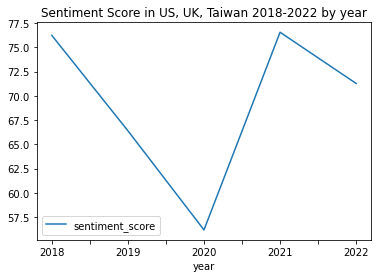

In [16]:
all_sentiment_df.plot(kind = 'line', x = 'year', y = 'sentiment_score', title = 'Sentiment Score in US, UK, Taiwan 2018-2022 by year')

The figure above shows the change in the lyrics sentiment score of songs from the US, the UK, and Taiwan between 2018 and 2022. The sentiment score is about 76 in 2018, it drops down rapidly after that reaching 56 in 2020, then it increases dramatically to 76 again in 2021, finally, it decreases to 72 in 2022.

Brand C O, Acerbi A, and Mesoudi A (2019) have found that the negative valenced emotional content in popular music increases from 1965 to 2015 while the positive one decreases. The finding could explain the two decreases from 2018 to 2020 and from 2021 to 2022. The lowest point of this period, however, is in 2020. There is a sharp drop before it and a sharp rise after it. We think this difference may due to COVID-19 that spreads worldwide in 2020. Many regions are in lockdown many times in 2020, and artists could be negatively affected by it. This is why the songs they write are filled with negative emotions compared with other years.

After 2020, many regions start to go back to normal life, so the lyrics sentiment score goes up from 2020 to 2021. Even though it goes down again from 2021 to 2022, it is far from the lowest point in 2020.

h. Get the sentiment score from the five dataframes of each region:

In [17]:
Billboard_sentiment = sentiment_sum(pd.read_csv('Top50_Billboard_2018.csv'), pd.read_csv('Top50_Billboard_2019.csv'), pd.read_csv('Top50_Billboard_2020.csv'), pd.read_csv('Top50_Billboard_2021.csv'), pd.read_csv('Top50_Billboard_2022.csv'))
Officialchart_sentiment = sentiment_sum(pd.read_csv('Top50_Officialchart_2018.csv'), pd.read_csv('Top50_Officialchart_2019.csv'), pd.read_csv('Top50_Officialchart_2020.csv'), pd.read_csv('Top50_Officialchart_2021.csv'), pd.read_csv('Top50_Officialchart_2022.csv'))
KKBOX_sentiment = sentiment_sum(pd.read_csv('Top50_KKBOX_2018.csv'), pd.read_csv('Top50_KKBOX_2019.csv'), pd.read_csv('Top50_KKBOX_2020.csv'), pd.read_csv('Top50_KKBOX_2021.csv'), pd.read_csv('Top50_KKBOX_2022.csv'))

i. Plot the sentiment scores from 2018 to 2022 by region:

<AxesSubplot:title={'center':'Sentiment Scores in US, UK, Taiwan 2018-2022 by region'}, xlabel='year'>

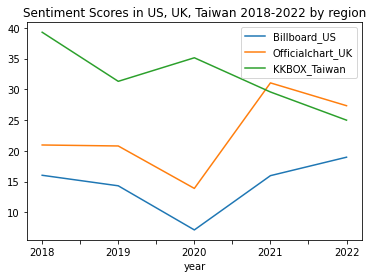

In [18]:
ax = Billboard_sentiment.plot(kind = 'line',x = 'year', y = 'sentiment_score', label = 'Billboard_US', legend = True, title = 'Sentiment Scores in US, UK, Taiwan 2018-2022 by region')
Officialchart_sentiment.plot(ax = ax, x = 'year', y = 'sentiment_score', label = 'Officialchart_UK', legend = True)
KKBOX_sentiment.plot(ax = ax, x = 'year', y = 'sentiment_score', label = 'KKBOX_Taiwan', legend = True)

This figure shows the difference in the lyrics sentiment scores of songs from the US, the UK, and Taiwan between 2018 and 2022. As we can see, the trend of the US and the UK are almost the same as the general pattern showed in the first figure - goes down from 2018 to 2020, goes up from 2020 to 2021, and decrease again from 2021 to 2022. There are some differences, however. The UK increases dramatically in 2021 reaching 32, far more than other years, while the US keeps going up slightly in 2022 rather than going down like other regions.

The different one is Taiwan, which increase a little in 2020 but keeps decreasing after that. This is not to say that artists from Taiwan are not influenced by COVID-19, but the influence came at a different time. Facing COVID-19, Taiwan has done a great job due to the strict quarantine policy and lockdown in 2020. The negative influence of COVID-19 begins to appear in 2021 and 2022 since the policy in Taiwan does not change a lot after 2020. So the lyrics sentiment score of Taiwan keeps going down from 2020 to 2022.

One thing we could also tell is that generally, the lyrics sentiment score of Taiwan is much higher than that of the other two regions. Taiwan begins at 39 in 2018, except for a small rise in 2020, it decrease to 29 in 2022. Even though the lyrics sentiment score of the UK starts at 21 in 2018, the sharp increase in 2021 makes it higher than the lyrics sentiment score of Taiwan and it keeps the highest in 2022. The lyrics sentiment score of the US is always the lowest during this period.

To conclude, artists' emotions are negatively influenced by COVID-19, resulting in more negative lyrics in their songs. Since different policies in different regions, the results of the influence may arrive at different times.

2) Wordcloud

a. Write the function to tokenize all the lyrics:

b. Get all song lyrics list from 3 music charts of each year

In [156]:
def merge_lyrics_list(csv_file1, csv_file2, csv_file3):
    df = concat_csv(csv_file1, csv_file2, csv_file3)
    lyrics_list = df['lyrics'].values.tolist()
    return lyrics_list

In [ ]:
Top50_Lyrics_2018 = merge_lyrics_list('Top50_Billboard_2018.csv', 'Top50_KKBOX_2018.csv', 'Top50_Officialchart_2018.csv')
Top50_Lyrics_2019 = merge_lyrics_list('Top50_Billboard_2019.csv', 'Top50_KKBOX_2019.csv', 'Top50_Officialchart_2019.csv')
Top50_Lyrics_2020 = merge_lyrics_list('Top50_Billboard_2020.csv', 'Top50_KKBOX_2020.csv', 'Top50_Officialchart_2020.csv')
Top50_Lyrics_2021 = merge_lyrics_list('Top50_Billboard_2021.csv', 'Top50_KKBOX_2021.csv', 'Top50_Officialchart_2021.csv')
Top50_Lyrics_2022 = merge_lyrics_list('Top50_Billboard_2022.csv', 'Top50_KKBOX_2022.csv', 'Top50_Officialchart_2022.csv')

In [ ]:
with open ('Top50_Lyrics_2018' +'.txt', 'w') as f:
        f.write(str(Top50_Lyrics_2018))
with open ('Top50_Lyrics_2019' +'.txt', 'w') as f:
        f.write(str(Top50_Lyrics_2019))
with open ('Top50_Lyrics_2020' +'.txt', 'w') as f:
        f.write(str(Top50_Lyrics_2020))
with open ('Top50_Lyrics_2021' +'.txt', 'w') as f:
        f.write(str(Top50_Lyrics_2021))                                
with open ('Top50_Lyrics_2022' +'.txt', 'w') as f:
        f.write(str(Top50_Lyrics_2022))        

In [31]:
def split_into_words(any_chunk_of_text):
    lowercase_text = any_chunk_of_text.lower()
    split_words = re.split("\W+", lowercase_text)
    return split_words 

c. Write the function to get the top 25 most frequent words from one directory path:

In [32]:
def top25_most_frequent_words(file_path):
    all_words = ""
    all_lyrics = open(file_path, encoding = "utf-8").read()
    all_words = split_into_words(all_lyrics)
    stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'você'
 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves','voce',
 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are','lyrics','translation',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does','yaka','eu','da','verse',
 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until','woo','que','noh','nbut',
 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into','nsend','lyricist','chorus','tryna',
 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down','nwhen','composer','nit','gon',
 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here','ft','fil','nwe','nwhy',
 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more','ayy','lil','la','ain','nwalk',
 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so','nyou', 'nand','nlike','nyeah','nin','na',
 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 've', 're', 'll', 'amp','yeah','oh','ooh','ni'，'u200e','doo']
    meaningful_words = []
    for word in all_words:
        if word not in stopwords:
            meaningful_words.append(word)
        
    meaningful_words_tally = Counter(meaningful_words)
    most_frequent_meaningful_words = meaningful_words_tally.most_common(25)
    top25 = []
    for word, frequent in (Counter(meaningful_words).most_common(25)):
        top25.append(word)
    top25_most_frequent_words = ','.join(top25) 
    return top25_most_frequent_words

d. Write the function to plot the top 25 most frequent words from one directory path to wordcloud:

In [33]:
def plot_wordcloud(file_path):
    wordcloud = WordCloud(background_color = 'white',repeat = False,max_words = 25,stopwords = 'a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z')
    wordcloud.generate(file_path)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

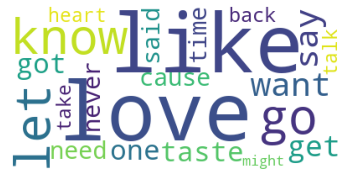

In [34]:
Top25_lyrics_2018 = plot_wordcloud(top25_most_frequent_words('Top50_Lyrics_2018.txt'))

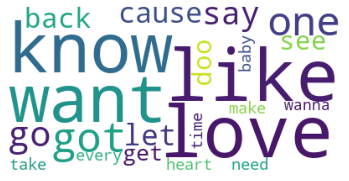

In [35]:
Top25_lyrics_2019 = plot_wordcloud(top25_most_frequent_words('Top50_lyrics_2019.txt'))

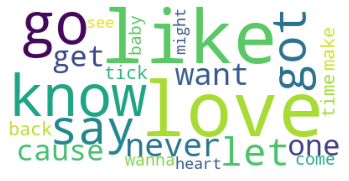

In [36]:
Top25_lyrics_2020 = plot_wordcloud(top25_most_frequent_words('Top50_lyrics_2020.txt'))

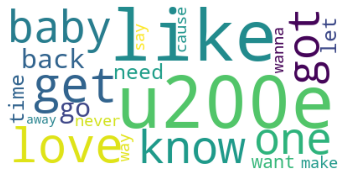

In [37]:
Top25_lyrics_2021 = plot_wordcloud(top25_most_frequent_words('Top50_lyrics_2021.txt'))

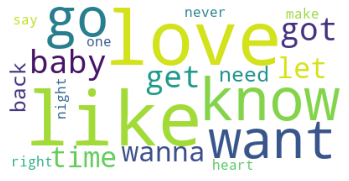

In [38]:
Top25_lyrics_2022 = plot_wordcloud(top25_most_frequent_words('Top50_lyrics_2022.txt'))

In this step, we take the song lyrics from three regions (UK, US, Taiwan) of the same year's song hotlist, ranking the top 50 songs, and divide them into 5 sections according to the year. Then, the words in the lyrics were ranked according to their frequency of recurrence, from highest to lowest, and then the top 25 with the highest frequency of occurrence were filtered to create a word cloud map.

Analyzing the word cloud from 2018 to 2022, the 25 most frequent words in the song list from 3 regions . We found that the words with the highest frequency are still relatively positive, such as . 'like', 'love', etc. In the word cloud of 2020, the negative word 'never' also appears more frequently than in other years.

3) TF-IDF

a. Install scikit-learn

In [ ]:
!pip install sklearn

b. Import necessary modules and libraries

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
pd.options.display.max_rows=600  
import glob

c.Make a DataFrame out of the resulting tf–idf vector


In [ ]:
def get_tfidf_df(directory_path):
    text_files = glob.glob(f"{directory_path}/*.txt")
    text_titles = [Path(text).stem for text in text_files]
    tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves','voce',
 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are','lyrics','translation',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does','yaka','eu','da','verse',
 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until','woo','que','noh','nbut',
 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into','nsend','lyricist','chorus','tryna',
 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down','nwhen','composer','nit','gon',
 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here','ft','fil','nwe','nwhy',
 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more','ayy','lil','la','ain','nwalk',
 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so','nyou', 'nand','nlike','nyeah','nin','na',
 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 've', 're', 'll', 'amp','yeah','oh','ooh','ni','u200e','39','você','u200a','ri','mi','di'])
    tfidf_vector = tfidf_vectorizer.fit_transform(text_files)
    tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names())
    tfidf_df.loc['Document Frequency'] = (tfidf_df > 0).sum()
    return tfidf_df

d.To find out the top 10 words with the highest tf–idf for each year


In [ ]:
def get_top_tfidf(directory_path):
    tfidf_df1 = get_tfidf_df(directory_path).drop('Document Frequency', errors='ignore')
    tfidf_df1 = tfidf_df1.stack().reset_index()
    tfidf_df1 = tfidf_df1.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})
    top_tfidf = tfidf_df1.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)
    return top_tfidf

e. Generate dataframe of top 10 words with the highest tf–idf for each year


In [ ]:
top_tfidf = get_top_tfidf("Top50_Lyrics")

In [ ]:
!pip install altair

f. Visualize TF-IDF results and make a heatmap that shows the highest TF-IDF scoring words


In [ ]:
import altair as alt
import numpy as np

def get_tfidf_chart(directory_path):
# adding a little randomness to break ties in term ranking
    top_tfidf_plusRand = get_top_tfidf(directory_path).copy()
    top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(get_top_tfidf(directory_path).shape[0])*0.0001

# base for all visualizations, with rank calculation
    base = alt.Chart(top_tfidf_plusRand).encode(
        x = 'rank:O',
        y = 'document:N'
    ).transform_window(
        rank = "rank()",
        sort = [alt.SortField("tfidf", order="descending")],
        groupby = ["document"],
    )

# heatmap specification
    heatmap = base.mark_rect().encode(
        color = 'tfidf:Q'
    )

# text labels, white for darker heatmap colors
    text = base.mark_text(baseline='middle').encode(
        text = 'term:N',
        color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
    )

    return (heatmap + text).properties(width = 600)

g. Generate TF-IDF Score Heatmap graph in html format in time period 2018-2022


In [ ]:
Top50_Lyrics_TFIDF_Heatmap = get_tfidf_chart('Top50_Lyrics')

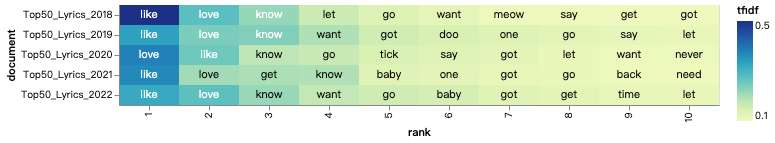

From the heatmap above, it contains the top 10 words with the highest tf-idf scores. According to Qaiser and Ali (2018), the tf-idf method provides a number of keywords that can be used to categorise specific documents and tag them with these keywords. This heat map shows that 'like' and 'love' are the themes of the lyrics each year.

Furthermore for a given word query, the tf-idf score ranks documents according to their relevance to that word (Chaudhary, 2020). We can find that the lyrics in 2018 have a higher correlation with the keyword 'like'. And by 2022, the association between the lyrics of all songs and the keyword 'like' becomes less strong, so we can guess that although the change in polarity of lyrics fluctuates from 2018 to 2022, the overall trend is that the polarity of lyrics becomes less positive.

3. Active Learning Exercises

If you need to study texts in multiple languages, here we would like to introduce you how to translate lyrics：

(1) Install pygtrans:

In [4]:
pip install pygtrans

Note: you may need to restart the kernel to use updated packages.


(2) Import Translate.

In [5]:
from pygtrans import Translate
client = Translate()

(3) You can use .detect( ) to detect the language of the text.

In [6]:
text = client.detect('Hello world.')
text.language

'en'

You can see the output as 'en'.It means that the text is written in English.
For more details about languages, please see the website: https://pygtrans.readthedocs.io/zh_CN/latest/target.html.

(4) Now,you can use  .translate()  function to translate. Use target='languange' to determine the language to be translated into.
Call  .translatedText  to show the translated text.

In [8]:
#Translate Chinese text into English.#
text = client.translate('填入你想翻译的文本。', target='en')
text.translatedText

'Fill in the text you want translated.'

In [9]:
#Translate English text into Dutch.#
text = client.translate('Fill in the text you want translated.', target='nl')
text.translatedText

'Vul de tekst in die u vertaald wilt hebben.'

(5) You can also translate all texts in a list at a time.You can still use target='languange' to determine which language you would like translate your texts into. 

In [10]:
#Translate English text into Italian.#
texts = client.translate([
    'Good morning. What can I do for you?',
    'Read aloud and underline the sentences about booking a flight.',
    'May I have your name and telephone number?'
],target='it')
[text.translatedText for text in texts]

['Buon giorno. Cosa posso fare per lei?',
 'Leggi ad alta voce e sottolinea le frasi sulla prenotazione di un volo.',
 'Posso avere il tuo nome e numero di telefono?']

For convenience, we can write a function to get the list of translation.

In [11]:
def translate_list(text_list):
    translate_list1 = []
    translate_list2 = client.translate(text_list,target='en')
    for item in translate_list2:
        translate_list1.append(item.translatedText)
    return translate_list1

(6) For our project, we translated the list of lyrics obtained by scraping the web page into English and saved them separately as txt files.Here I can show you with a simple example how we handle this.

In [13]:
#Create a index list and a list of texts.#
index_list = [1,2,3]
text_list = ['Buon giorno. Cosa posso fare per lei?',
 'Leggi ad alta voce e sottolinea le frasi sulla prenotazione di un volo.',
 'Posso avere il tuo nome e numero di telefono?']

#Use for loop to save texts.#

for number, text in zip(index_list, translate_list(text_list)):
        #Save each text into a text file.#
        filename = f"{number}_translation"
        with open (filename +'.txt', 'w') as f:
            f.write(text)

For convenience, we can write a function.You can try with this function.

In [14]:
def save_single_translation(list1,text_list):
    translate_list1 = translate_list(text_list)
    for number, text in zip(list1, translate_list1):
            filename = f"{number}_translation"
            with open (filename +'.txt', 'w') as f:
                f.write(text)

(7) You can also write the translated text to a dataframe. Remember import pandas at first.

In [15]:
import pandas as pd

In [16]:
#Create a index list ，a list of language and a list of texts.#
index_list = [1,2,3]
language_list = ['Chinese','Italian','Dutch']
text_list = [
    '你好，请问能为你做什么？',
    'Posso avere il tuo nome e numero di telefono?.',
    'Waar kom je vandaan.']
Translation_list = translate_list(text_list)
#Put all lists in a dictionary to create a dataframe.#
dict_translation = {}
dict_translation['text'] = text_list
dict_translation['language'] = language_list
dict_translation['Translation'] = Translation_list
dict_translation_df = pd.DataFrame(dict_translation)
dict_translation_df.index = index_list
dict_translation_df

text language  \
1                                    你好，请问能为你做什么？  Chinese   
2  Posso avere il tuo nome e numero di telefono?.  Italian   
3                            Waar kom je vandaan.    Dutch   

                               Translation  
1            Hello, what can I do for you?  
2  Can I have your name and phone number?.  
3                  Where do you come from.

We can then save the dataframe as a csv file using 'to_csv' for subsequent analysis.

In [17]:
dict_translation_df.to_csv('translation.csv')

References:

Chaudhary, K. (2020). Sentiment analysis with python: TFIDF features. Drops of AI. Retrieved January 17, 2023, from https://dropsofai.com/sentiment-analysis-with-python-tfidf-features/ 

Qaiser, S., & Ali, R. (2018). Text Mining: Use of TF-IDF to Examine the Relevance of Words to Documents. International Journal of Computer Applications, 181(1), 25–29. https://doi.org/10.5120/ijca2018917395

Brand C O. Acerbi A. Mesoudi A. (2019 November). Cultural evolution of emotional expression in 50 years of song lyrics. Cambridge University Press.